# Sklearn Random Forest Regression for seasonal selections

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:


%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split

# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle5 as Pickle

C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230202
20230202_191403


### Import data

In [3]:
#date_str = "20230201"
drive = "F"
data_date = "20230201"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 0


In [4]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

In [5]:
ml_rf_reg_dir= os.path.join(output_dir, "ml_rf_reg_dir")
export_ml_rf_reg_dir = os.path.join(ml_rf_reg_dir, date_time_str)
plots_dir = os.path.join(export_ml_rf_reg_dir, "ml_rf_reg_plots_dir")
all_plots_dir = os.path.join(plots_dir, "all")
no_tern_plots_dir = os.path.join(plots_dir, "no_tern")
mk_dir_fn(output_dir)
mk_dir_fn(ml_rf_reg_dir)
mk_dir_fn(export_ml_rf_reg_dir)
mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
mk_dir_fn(no_tern_plots_dir)

## Load data

In [ ]:
file_list = []
for f in glob(os.path.join(dir_, "*reg.csv")):
    print(f)
    file_list.append(f)
    _, file_name = os.path.split(f)
    split_list = file_name.split(".")
    print(split_list[0])

In [7]:
df = pd.read_csv(file_list[index_], header=0)

In [8]:
df

target        site  uid      date  bio_agb_kg1ha  b1_fpca2_0509_min  \
0       0.00       nt001  119  20110523           0.00              13.78   
1       0.00   barkely01   42  20111025           0.00               0.75   
2       0.00   barkely02   43  20111026           0.00               2.12   
3       0.00   barkely04   45  20111026           0.00               2.12   
4       0.00   barkely03   44  20111026           0.00               0.75   
..       ...         ...  ...       ...            ...                ...   
162 20805.22  ntadac0002    5  20160506       20805.22              15.54   
163 30472.45  ntaarp0001    1  20160602       30472.45              27.61   
164 24414.13  ntaarp0002    2  20160602       24414.13               9.06   
165 17598.35  ntaarp0003    3  20160603       17598.35               5.26   
166  9995.51      buff01    3  20210713        9995.51              19.30   

     b1_fpca2_0509_max  b1_fpca2_0509_mean  b1_fpca2_0509_med  \
0                47.00               25.85              23.87   
1                 2.87                1.69               1.49   
2                13.78                4.97               4.73   
3                 6.42                4.37               4.47   
4                 3.29                1.82               1.64   
..                 ...                 ...                ...   
162              42.39               29.12              29.27   
163              38.92               34.75              34.33   
164              22.31               14.40              14.21   
165              25.45               13.08              12.11   
166              40.08               30.47              32.06   

     b1_fpca2_0509_std  ...    NDGIm      RIm     NBRm    NDIIm    GDVIm  \
0                 8.48  ... -1797183  1797183   803085 -1648544  1653000   
1                 0.70  ... -1237840  1237840   145478 -1258856  1100000   
2                 2.43  ... -1563211  1563211   758167  -969300  1320000   
3                 1.22  ... -1493838  1493838   965693  -982236  1174000   
4                 0.70  ... -1481481  1481481    -2046 -1713026  1178000   
..                 ...  ...      ...      ...      ...      ...      ...   
162               6.84  ...  -652174   652174  4386747  1261845  1828000   
163               3.24  ... -1485714  1485714  4017258  1123510  1746000   
164               3.60  ... -2065698  2065698  2615783   222222  1810000   
165               5.79  ... -1885790  1885790  2958064   395123  1691000   
166               6.23  ...   770925  -770925  5614599  2339640  2185000   

      MSAVIm     DVIm    SAVIm    NDVIm      MSRm  
0    2108509  1334000  2374229  3891482   5080174  
1    1063379   731000  1207466  1791228   1985065  
2    1195078   839000  1339257  1908119   2131007  
3     951763   677000  1068835  1504110   1636492  
4    1068186   738000  1210101  1779171   1970149  
..       ...      ...      ...      ...       ...  
162  3096442  1768000  3422819  6433770  11466633  
163  2727661  1590000  3059261  5686695   9070438  
164  2372051  1483000  2650423  4370763   5977733  
165  2284112  1407000  2574722  4401001   6037665  
166  3960474  2255000  4179538  7290656  15262347  

[167 rows x 180 columns]

In [9]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [10]:
df2 = df.copy(deep=True)

In [11]:
print(list(df2.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

### Set variables to plot

In [12]:
# # predicted value is x
# value_x = 'bio_agb_kg1ha'
# # variable is y
# value_y = "b1_h99a_01122_mean"
# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


In [13]:
# value_y

In [14]:
# df2.shape

In [15]:
def save_fig(value_x, value_y, value_a, value_b, out_file):
    # Output to file
    output_file(out_file, 
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))



    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site'),
                ('Date', '@date'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [16]:
# save_fig(value_x, value_y)

In [17]:
# column_list

In [18]:
column_list = df2.columns.to_list()
y_list = column_list[5:]
value_x = column_list[:1][0]

value_a = 'date'
value_b = 'b1_fpca2_0509_mean'


for i in y_list:
    value_y = i
    
    out_file = os.path.join(all_plots_dir,'all_sites_{0}_{1}.html'.format(value_x, value_y))
    save_fig(value_x, value_y, value_a, value_b, out_file)
    

### Drop AGB numbers which are high

In [19]:
# # drop the 7 tern sites that apear to be outliers
# df3 =df2[df2[value_x] <= 100000]
# df3.to_csv(os.path.join(output_dir, "{0}_lt_100000.csv".format(value_x)))
# drop_sites =df2[df2[value_x] > 100000]
# drop_sites.value_counts(['site', value_x, value_y])


In [20]:
# df3.shape

In [21]:

# # Output to file
# output_file(os.path.join(output_, 'TERN7_removed_sites_{0}_{1}.html'.format(value_x, value_y)),
#             title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


# #Specify the selection tools to be made available
# select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

# # Format the tooltip
# tooltips = [
#             ('Site', '@site'),
#             ('Date', '@date'),
#             (value_x, '@{0}'.format(value_x)),
#             (value_y, '@{0}'.format(value_y)),
#             (value_a, '@{0}'.format(value_a)),
#             (value_b, '@{0}'.format(value_b)) 
#            ]

# # Create the figure
# fig = figure(plot_height=400,
#              plot_width=1500,
#              y_axis_label= value_y.replace("_", " "), 
#              x_axis_label= value_x.replace("_", " "),
#              title='Seven TERN sites removed - relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
#              toolbar_location='below',
#              tools=select_tools)

# # # Format the y-axis tick label
# fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

# # Add square representing each site
# fig.square(x= value_x,
#            y= value_y,
#            source=df3,
#            size=5,
#            color='royalblue',
#            selection_color='deepskyblue',
#            nonselection_color='lightgray',
#            nonselection_alpha=0.3)

# # Add the HoverTool to the figure
# fig.add_tools(HoverTool(tooltips=tooltips))

# # Visualize
# show(fig)

### Drop the TERN sites for review

In [22]:
# # drop the TERN sites due to 
# df4=df3[df3.site.apply(lambda x: len(str(x))<=9)]
# df4.to_csv(os.path.join(output_dir, "{0}_NTG_only.csv".format(value_x)))

In [23]:
# column_list = df4.columns.to_list()
# y_list = column_list[5:]
# value_x = column_list[:1][0]

# value_a = 'date'
# value_b = 'b1_fpca2_0509_mean'


# for i in y_list:
#     value_y = i
    
#     out_file = os.path.join(no_tern_plots_dir,'no_tern_sites_{0}_{1}.html'.format(value_x, value_y))
#     save_fig(value_x, value_y, value_a, value_b, out_file)

## Choose which data set to run the models from

In [24]:
df_ml = df2
# df_ml = df

In [25]:
print(list(df_ml.columns))

['target', 'site', 'uid', 'date', 'bio_agb_kg1ha', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1

In [26]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date', 'bio_agb_kg1ha'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [27]:
print(list(df_ml))

['target', 'b1_fpca2_0509_min', 'b1_fpca2_0509_max', 'b1_fpca2_0509_mean', 'b1_fpca2_0509_med', 'b1_fpca2_0509_std', 'b1_h99a_01122_min', 'b1_h99a_01122_max', 'b1_h99a_01122_mean', 'b1_h99a_01122_med', 'b1_h99a_01122_std', 'b1_dbi_0608_min', 'b1_dbi_0608_max', 'b1_dbi_0608_mean', 'b1_dbi_0608_med', 'b1_dbi_0608_std', 'b2_dbi_0608_min', 'b2_dbi_0608_max', 'b2_dbi_0608_mean', 'b2_dbi_0608_med', 'b2_dbi_0608_std', 'b3_dbi_0608_min', 'b3_dbi_0608_max', 'b3_dbi_0608_mean', 'b3_dbi_0608_med', 'b3_dbi_0608_std', 'b4_dbi_0608_min', 'b4_dbi_0608_max', 'b4_dbi_0608_mean', 'b4_dbi_0608_med', 'b4_dbi_0608_std', 'b5_dbi_0608_min', 'b5_dbi_0608_max', 'b5_dbi_0608_mean', 'b5_dbi_0608_med', 'b5_dbi_0608_std', 'b6_dbi_0608_min', 'b6_dbi_0608_max', 'b6_dbi_0608_mean', 'b6_dbi_0608_med', 'b6_dbi_0608_std', 'b1_dja_0305_min', 'b1_dja_0305_max', 'b1_dja_0305_mean', 'b1_dja_0305_med', 'b1_dja_0305_std', 'b1_dp1_0112_min', 'b1_dp1_0112_max', 'b1_dp1_0112_mean', 'b1_dp1_0112_std', 'b1_dp1_0112_med', 'b2_dp1_0

In [28]:
df_ml.shape

(167, 176)

In [29]:
df_ml.head(5)

target  b1_fpca2_0509_min  b1_fpca2_0509_max  b1_fpca2_0509_mean  \
0    0.00              13.78              47.00               25.85   
1    0.00               0.75               2.87                1.69   
2    0.00               2.12              13.78                4.97   
3    0.00               2.12               6.42                4.37   
4    0.00               0.75               3.29                1.82   

   b1_fpca2_0509_med  b1_fpca2_0509_std  b1_h99a_01122_min  b1_h99a_01122_max  \
0              23.87               8.48               7.27              11.78   
1               1.49               0.70               4.38               8.97   
2               4.73               2.43               3.13               5.82   
3               4.47               1.22               5.93               8.85   
4               1.64               0.70               3.66               7.09   

   b1_h99a_01122_mean  b1_h99a_01122_med  ...    NDGIm      RIm    NBRm  \
0                9.24               8.86  ... -1797183  1797183  803085   
1                6.83               7.18  ... -1237840  1237840  145478   
2                4.55               4.43  ... -1563211  1563211  758167   
3                7.68               7.68  ... -1493838  1493838  965693   
4                4.98               4.85  ... -1481481  1481481   -2046   

     NDIIm    GDVIm   MSAVIm     DVIm    SAVIm    NDVIm     MSRm  
0 -1648544  1653000  2108509  1334000  2374229  3891482  5080174  
1 -1258856  1100000  1063379   731000  1207466  1791228  1985065  
2  -969300  1320000  1195078   839000  1339257  1908119  2131007  
3  -982236  1174000   951763   677000  1068835  1504110  1636492  
4 -1713026  1178000  1068186   738000  1210101  1779171  1970149  

[5 rows x 176 columns]

## Qty of 0 values dataset 

In [30]:
model_data = df_ml
model_data_name = "all_values"

# ## Filter out all taregt == 0 values
# model_data = df_ml[df_ml['target']>0.0]
# model_data_name = "no0_values"

# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(export_ml_rf_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)

F:\cdu\data\zonal_stats\output\20230202\ml_rf_reg_dir\20230202_191403\all_values


In [31]:
model_data.dropna(inplace=True)

 Define if you are using all variabes or selected variables

# Scatter plots with error

b1_fpca2_0509_min
slope:  0.0007060649815931615
intersept:  3.05643805223447
r2:  0.6697744714166004
P_value:  4.311406896101535e-23
std error:  6.094082658865955e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


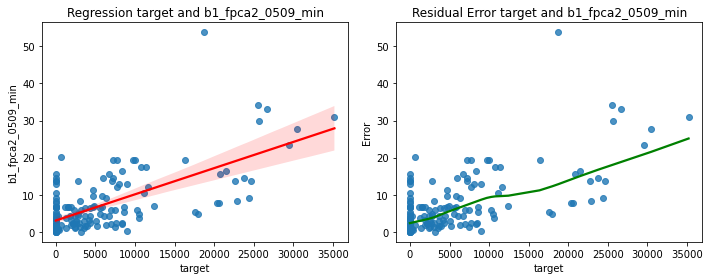

b1_fpca2_0509_max
slope:  0.0011202115697975755
intersept:  11.254412594840822
r2:  0.6680461286822871
P_value:  6.104388470146009e-23
std error:  9.713920109049272e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


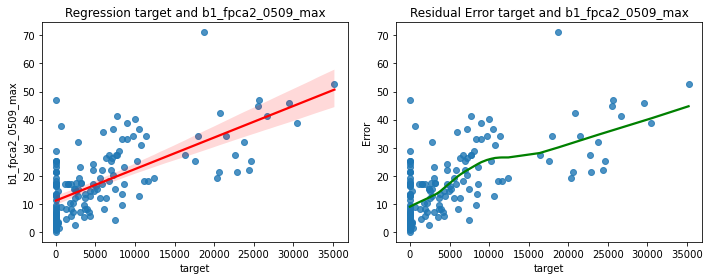

b1_fpca2_0509_mean
slope:  0.0009215536278299588
intersept:  6.357605230726728
r2:  0.6899753402971576
P_value:  6.1831474667591285e-25
std error:  7.526332056625285e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


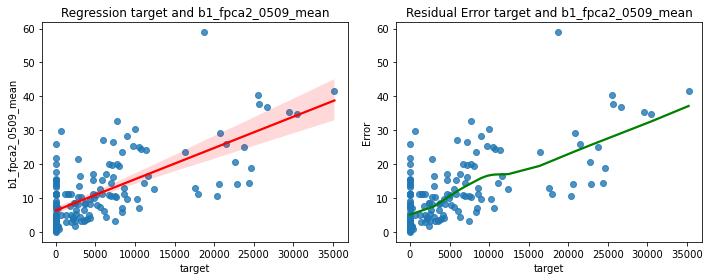

b1_fpca2_0509_med
slope:  0.0009195424486835837
intersept:  6.1215537825018425
r2:  0.6790652786109602
P_value:  6.384014917830973e-24
std error:  7.738564882844498e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


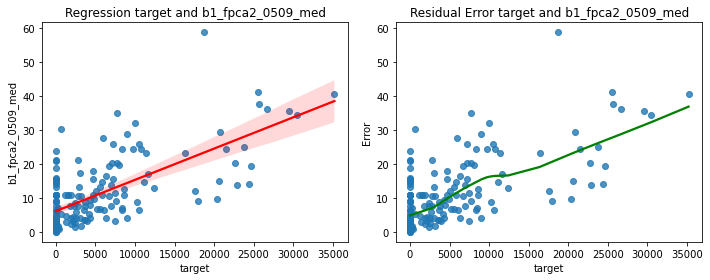

b1_fpca2_0509_std
slope:  0.00010760251335414243
intersept:  2.228900421055687
r2:  0.41582378859329616
P_value:  2.291375212355625e-08
std error:  1.83209356346937e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


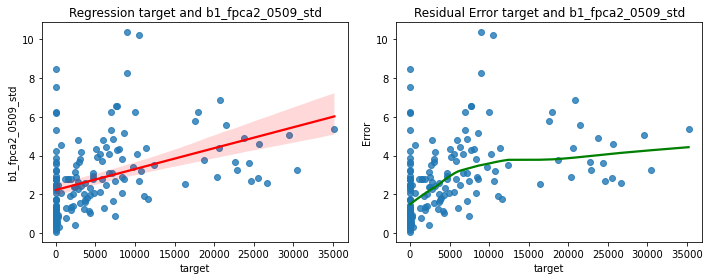

b1_h99a_01122_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0003041977428780928
intersept:  5.824221069179805
r2:  0.5960800906767868
P_value:  1.9231235889901368e-17
std error:  3.189953621872925e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


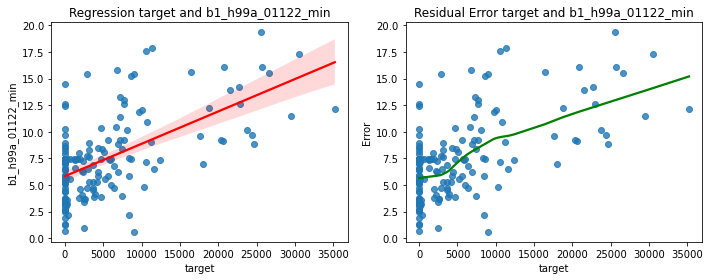

b1_h99a_01122_max
slope:  0.00040250571079586303
intersept:  10.089472932804252
r2:  0.6519745074576814
P_value:  1.3901047039172223e-21
std error:  3.644237380222844e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


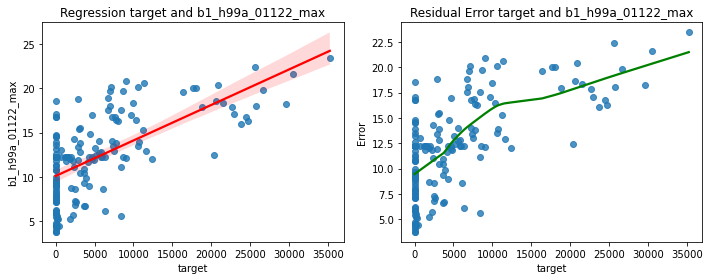

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_h99a_01122_mean
slope:  0.0003416173309711187
intersept:  7.936726257148695
r2:  0.6235136472134624
P_value:  2.2678993342104535e-19
std error:  3.3346829610666055e-05


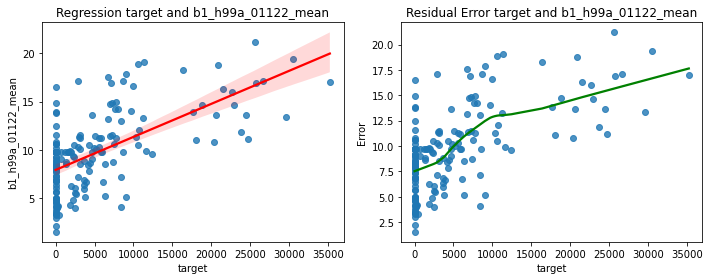

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_h99a_01122_med
slope:  0.0003361844988948893
intersept:  7.943652996445664
r2:  0.6105467203797276
P_value:  1.951714455864823e-18
std error:  3.394932599151655e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


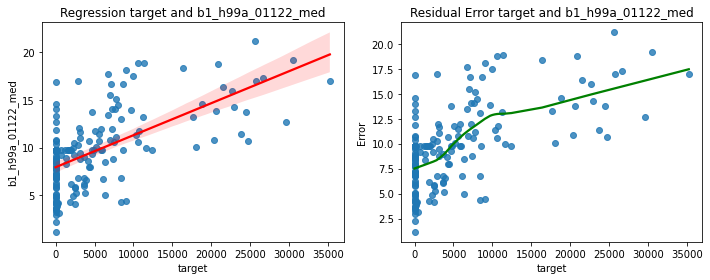

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_h99a_01122_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  2.3465525356764713e-05
intersept:  1.1536588257175928
r2:  0.28589376427758506
P_value:  0.0001801848036604529
std error:  6.123046881796205e-06


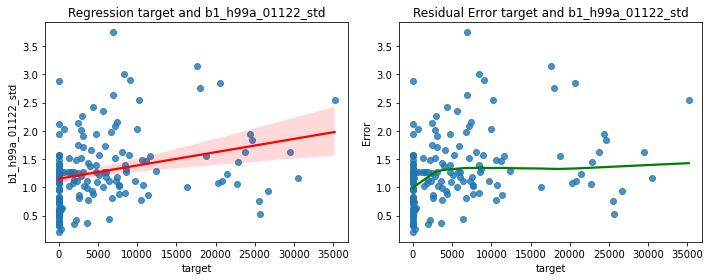

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_0608_min
slope:  -0.014716870487511297
intersept:  528.6918280372779
r2:  -0.5345339438349332
P_value:  1.0048712536345672e-13
std error:  0.0018114671578808624


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


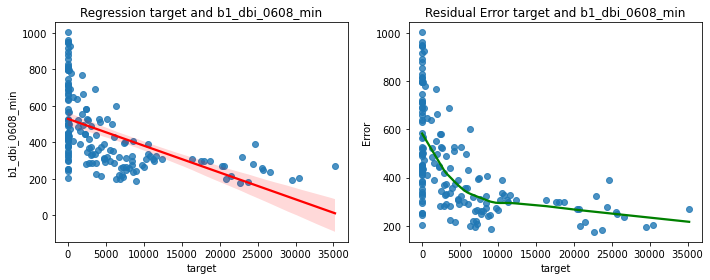

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_0608_max
slope:  -0.015660866492990734
intersept:  662.3960063725716
r2:  -0.5163306782964131
P_value:  9.193502802743149e-13
std error:  0.0020221674572936106


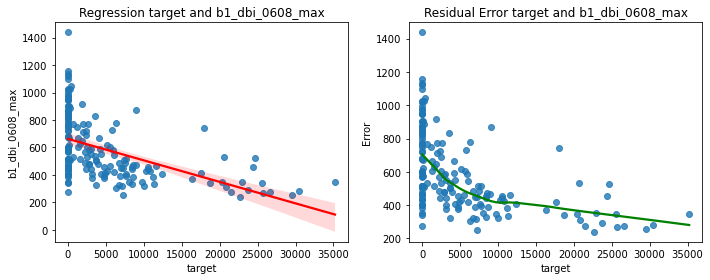

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_0608_mean
slope:  -0.015405036504738734
intersept:  593.4835856225848
r2:  -0.5428039530970616
P_value:  3.515338902555295e-14
std error:  0.0018555999948744962


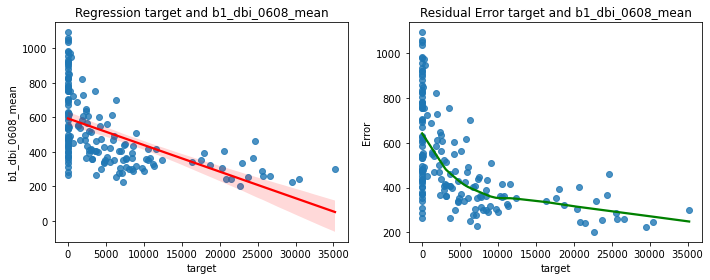

b1_dbi_0608_med
slope:  -0.01543189589552449
intersept:  592.432409596508
r2:  -0.5432083863677386
P_value:  3.336865616137422e-14
std error:  0.001856872972362435


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


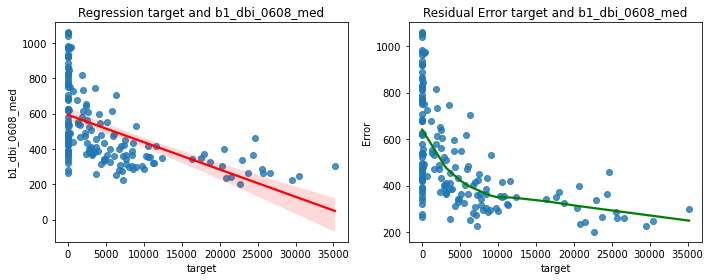

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dbi_0608_std
slope:  -0.00025504119157387494
intersept:  36.3991876586095
r2:  -0.07394105760275695
P_value:  0.3422886782402359
std error:  0.0002677886935625442


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


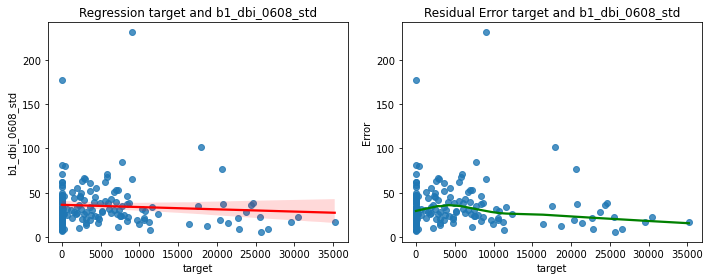

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_0608_min
slope:  -0.02231320838753065
intersept:  831.1954457803633
r2:  -0.5681750496875606
P_value:  1.1633212074265067e-15
std error:  0.0025158748079858913


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


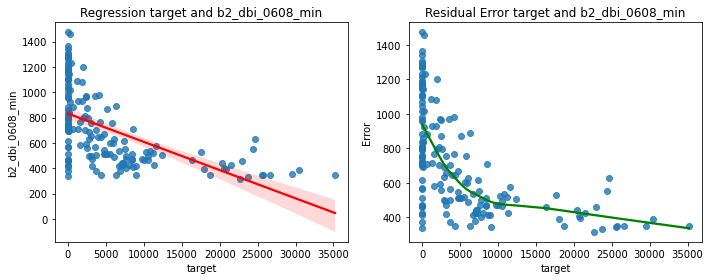

b2_dbi_0608_max


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.023629581523796545
intersept:  1020.0434077343546
r2:  -0.533354158507759
P_value:  1.1645941920928359e-13
std error:  0.002917516429487359


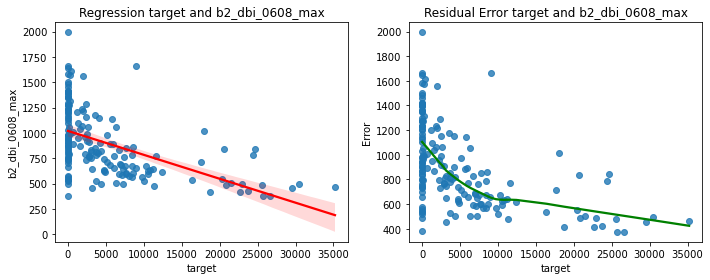

b2_dbi_0608_mean
slope:  -0.02343839830279984
intersept:  923.8523607471341
r2:  -0.5742971430195479
P_value:  4.888931582387555e-16
std error:  0.0026010334560615657


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


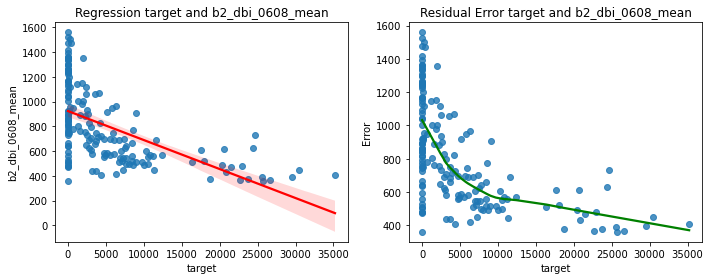

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_0608_med
slope:  -0.023584493873690087
intersept:  922.4927608013925
r2:  -0.578273319188582
P_value:  2.7572192153854113e-16
std error:  0.00259034780115375


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


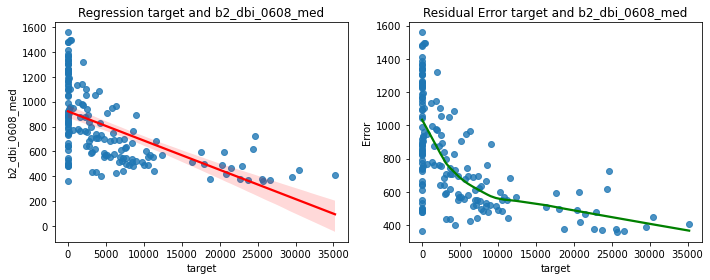

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dbi_0608_std
slope:  -0.00034316555721610213
intersept:  51.923805943146974
r2:  -0.06058513010620985
P_value:  0.43670656992691614
std error:  0.00044014640321970284


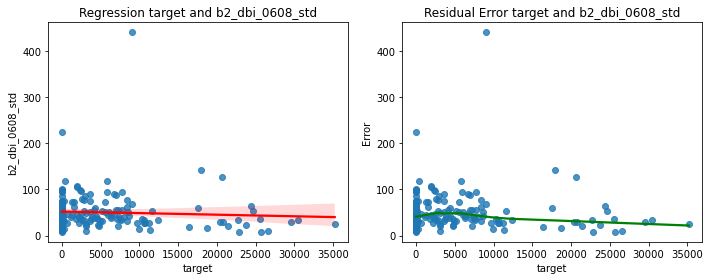

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_0608_min
slope:  -0.03784730997689291
intersept:  1223.6552671967906
r2:  -0.6116259027506995
P_value:  1.6377645930709999e-18
std error:  0.0038112235479135803


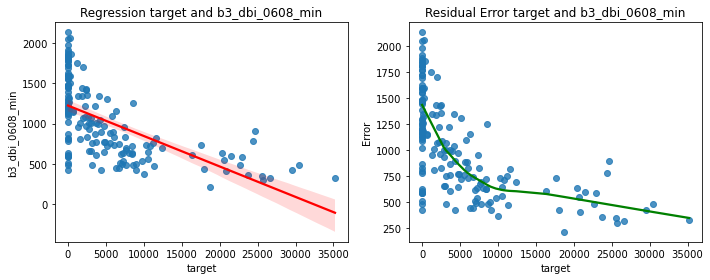

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_0608_max
slope:  -0.03783101387571076
intersept:  1512.5388474528459
r2:  -0.5559645416126434
P_value:  6.220019216655614e-15
std error:  0.0044031916476311595


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


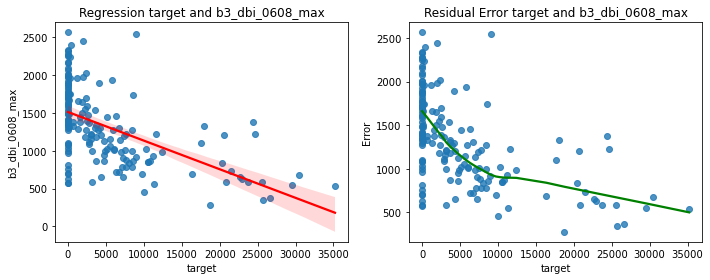

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dbi_0608_mean
slope:  -0.03902610082204671
intersept:  1368.6701927238291
r2:  -0.6115780402382325
P_value:  1.6505763086278666e-18
std error:  0.003930419132585365


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


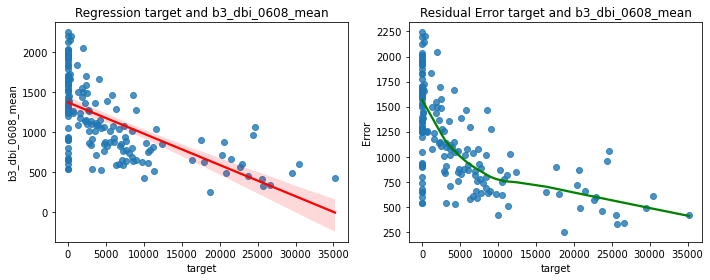

b3_dbi_0608_med
slope:  -0.039633510863138655
intersept:  1368.3917054826925
r2:  -0.6177464861770909
P_value:  5.980300550437778e-19
std error:  0.0039277267373419465

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


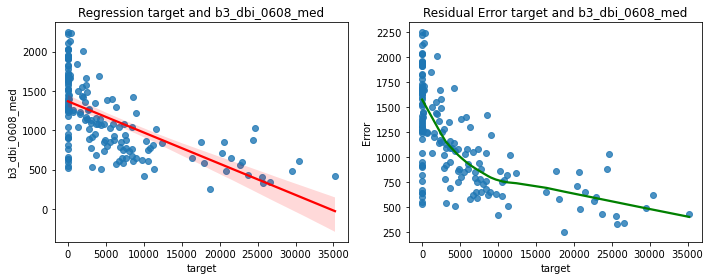

b3_dbi_0608_std
slope:  4.9697920481438245e-05
intersept:  80.206087547517
r2:  0.0053587017167115066
P_value:  0.945204498671568
std error:  0.0007219887420762694


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


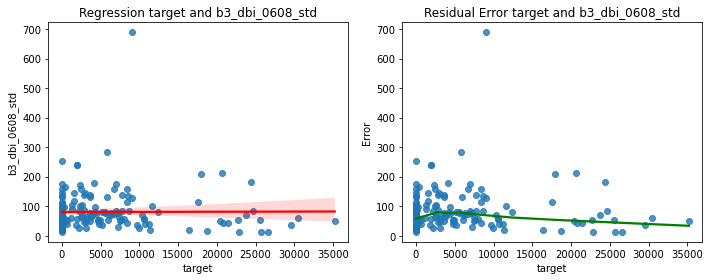

b4_dbi_0608_min
slope:  -0.022767256916435788
intersept:  2260.6708441334085
r2:  -0.4006480945670414
P_value:  8.090894530223415e-08
std error:  0.004053322105375215


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


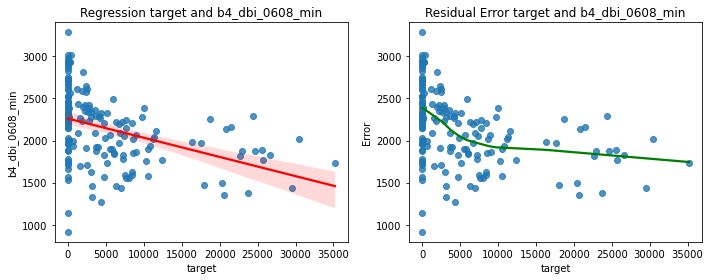

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b4_dbi_0608_max
slope:  -0.017592906946890946
intersept:  2611.1159622109208
r2:  -0.3123034671784965
P_value:  3.9774729105078736e-05
std error:  0.004166145019417152


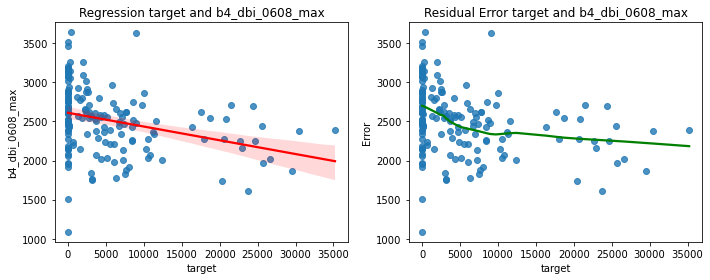

b4_dbi_0608_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.02082593532413407
intersept:  2433.3457522155854
r2:  -0.3765314748205717
P_value:  5.299817139045135e-07
std error:  0.003988977602046869


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


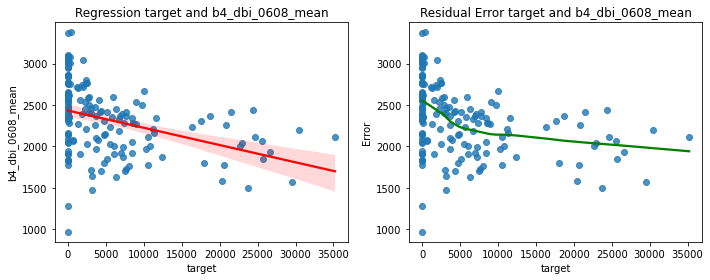

b4_dbi_0608_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.021104081511961723
intersept:  2429.1621238058515
r2:  -0.37776504405427835
P_value:  4.831434841659924e-07
std error:  0.004026868970800313


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


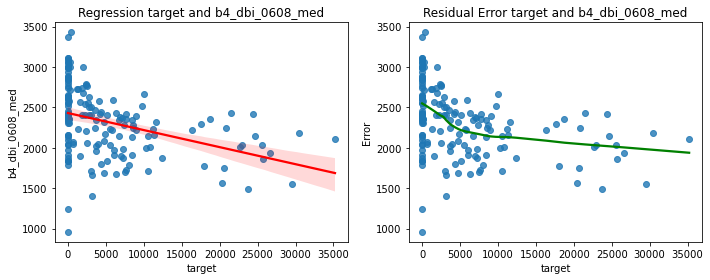

b4_dbi_0608_std
slope:  0.0014102651395269243
intersept:  97.3552283149821
r2:  0.166473201767277
P_value:  0.03154125958269135
std error:  0.0006502968236364743


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


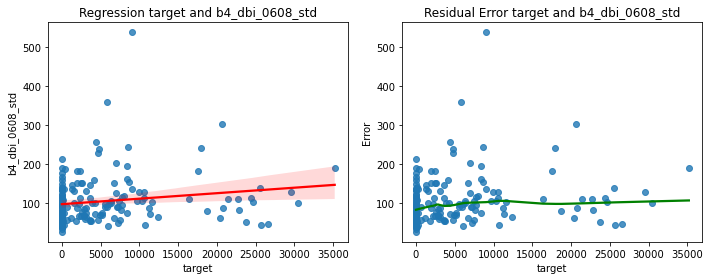

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_0608_min
slope:  -0.056559244612691524
intersept:  2743.685697361384
r2:  -0.6364559297130731
P_value:  2.388337180705826e-20
std error:  0.00533610026161716


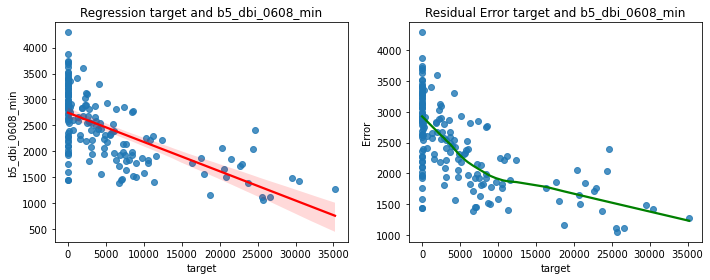

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_0608_max
slope:  -0.05161316779958179
intersept:  3209.330232015473
r2:  -0.5626808459049872
P_value:  2.4946426156087566e-15
std error:  0.005903244965894344


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


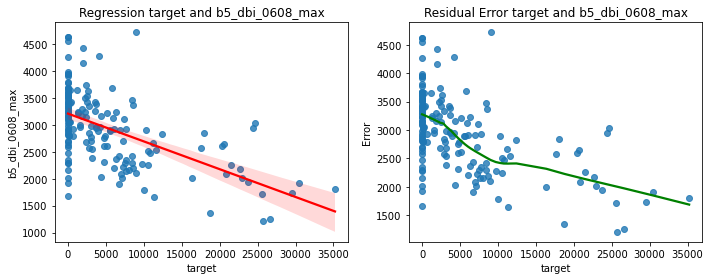

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_0608_mean
slope:  -0.05584160729101787
intersept:  2977.8684855219003
r2:  -0.6296718644743292
P_value:  7.874443576605194e-20
std error:  0.005363460517472749


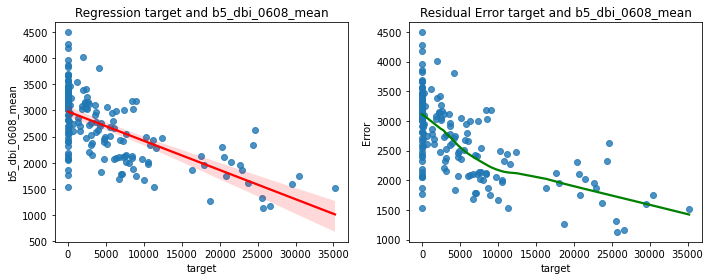

b5_dbi_0608_med
slope:  -0.05635748661732418
intersept:  2975.3665115444996
r2:  -0.6350429298185077
P_value:  3.069533185159596e-20
std error:  0.005336936432454575


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


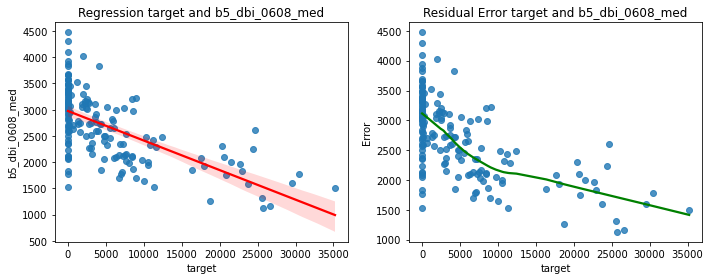

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b5_dbi_0608_std
slope:  0.0013262631895614337
intersept:  130.13935242264571
r2:  0.10366746108136549
P_value:  0.182462353042227
std error:  0.0009906015018723846


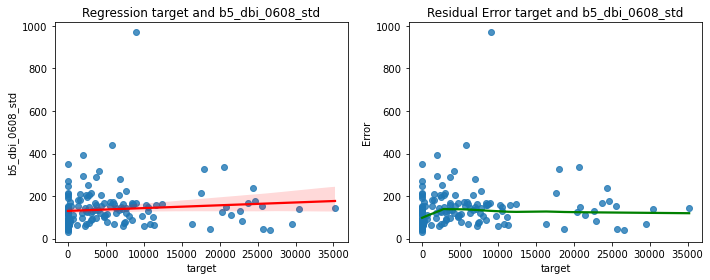

b6_dbi_0608_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0487101835075926
intersept:  1795.1702775815809
r2:  -0.6354362236874912
P_value:  2.862835586895929e-20
std error:  0.0046079673002648635


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


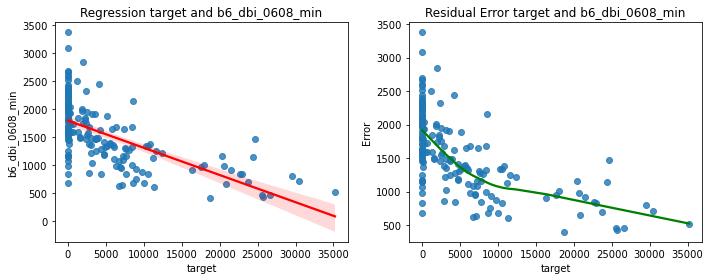

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_0608_max
slope:  -0.046842155029455934
intersept:  2230.6822340006115
r2:  -0.5380375255793777
P_value:  6.462275720949876e-14
std error:  0.005713064714750559


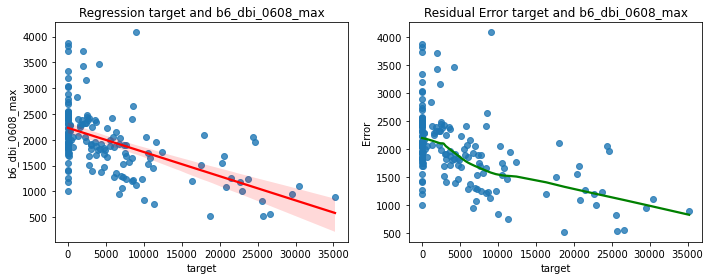

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_0608_mean
slope:  -0.04923523299958291
intersept:  2011.0575813161379
r2:  -0.6182369758909514
P_value:  5.5112004863805e-19
std error:  0.00487300706064632


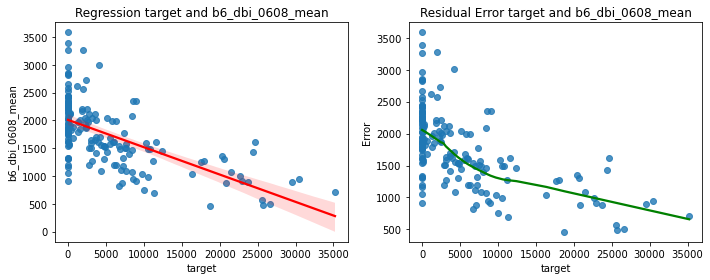

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_0608_med
slope:  -0.04980219798740535
intersept:  2009.0581591755038
r2:  -0.6246201085687326
P_value:  1.8785912733463159e-19
std error:  0.0048473233514359625


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


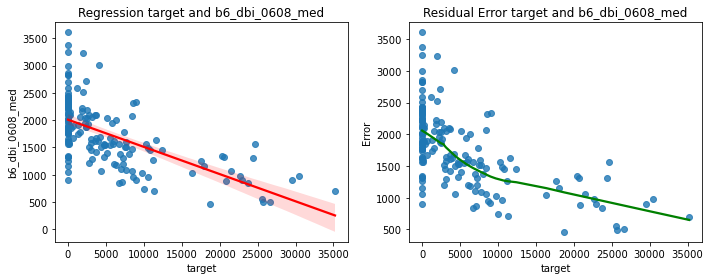

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b6_dbi_0608_std
slope:  0.000624950802973547
intersept:  118.22773169287129
r2:  0.04681999152710276
P_value:  0.5479513593062562
std error:  0.0010379967507603814


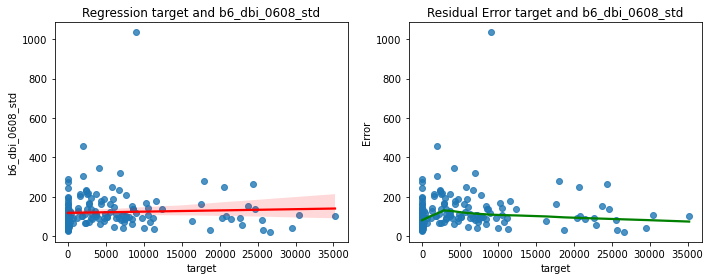

b1_dja_0305_min
slope:  0.0009043767970960565
intersept:  8.008245336709628
r2:  0.6464781444840315
P_value:  3.878337771003058e-21
std error:  8.308826898599881e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


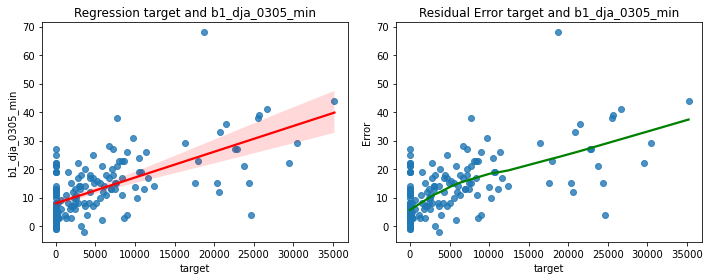

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_0305_max
slope:  0.0012000586366648714
intersept:  14.711134423918256
r2:  0.703006359900889
P_value:  3.3108578959096513e-26
std error:  9.451112882630085e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


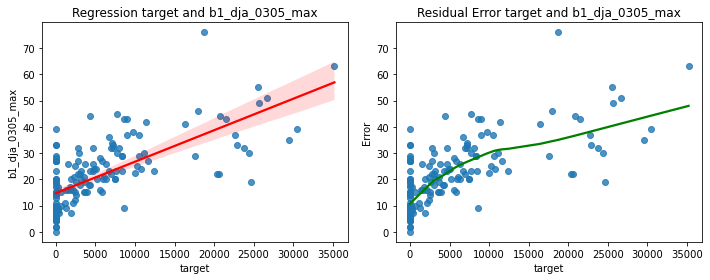

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_0305_mean
slope:  0.0010577988409210628
intersept:  11.48278962726027
r2:  0.691036327221219
P_value:  4.900245782905295e-25
std error:  8.613713337116522e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


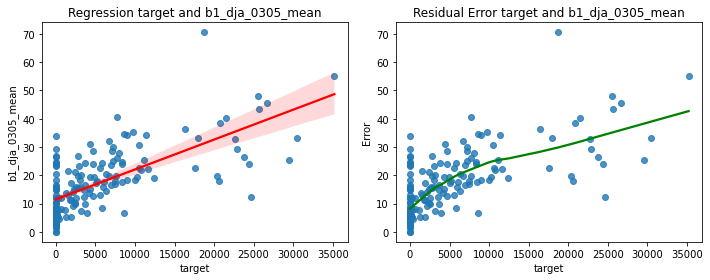

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_0305_med
slope:  0.0010577957939795013
intersept:  11.553183226742842
r2:  0.6877288709152929
P_value:  1.008366823050963e-24
std error:  8.692803526826867e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


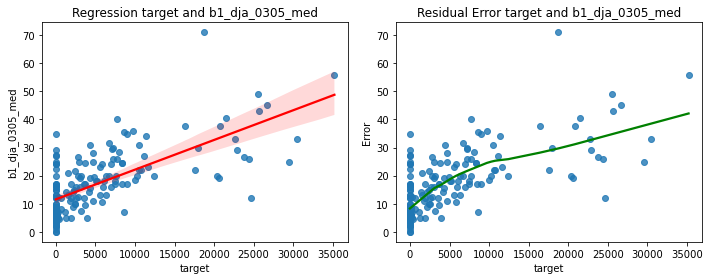

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dja_0305_std
slope:  7.329113946192905e-05
intersept:  1.862275065908464
r2:  0.36913897984443295
P_value:  9.154483387683525e-07
std error:  1.4365151431398891e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


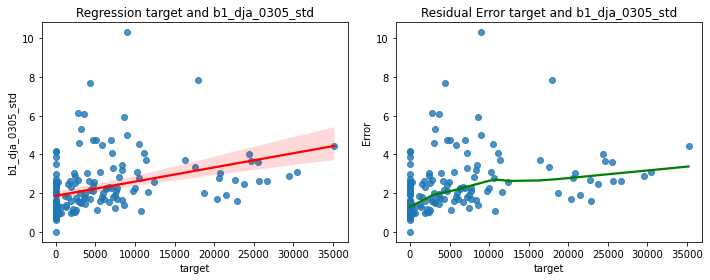

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0112_min
slope:  -0.0006363566227751891
intersept:  16.88882831185762
r2:  -0.36341852605277725
P_value:  1.3845669337001134e-06
std error:  0.00012699690198529658


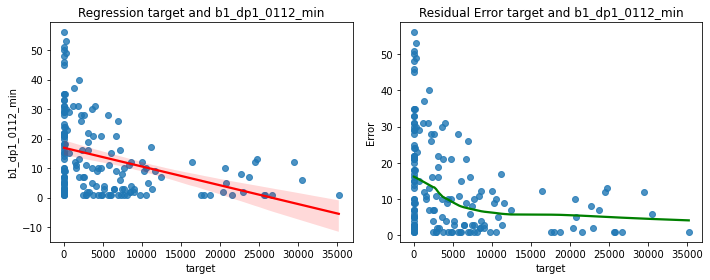

b1_dp1_0112_max
slope:  -0.0007891896887894568
intersept:  26.790978455034185
r2:  -0.36867233054641985
P_value:  9.47155615776619e-07
std error:  0.0001549087828150125


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


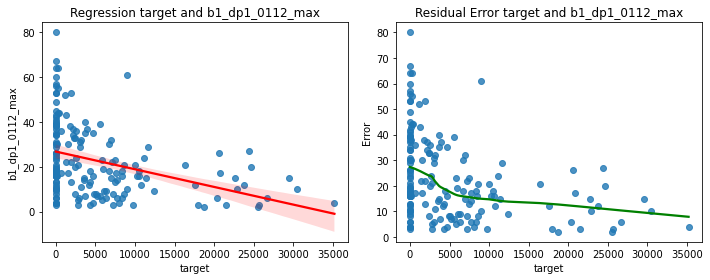

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0112_mean
slope:  -0.0007224125958797781
intersept:  21.627229275544018
r2:  -0.3722075465661894
P_value:  7.308287234385589e-07
std error:  0.00014024135861550105


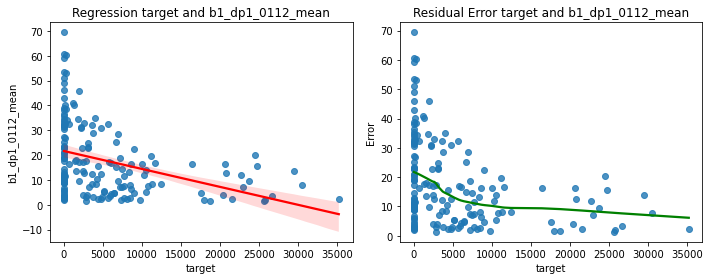

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0112_std
slope:  -4.307856555343491e-05
intersept:  2.9526876391453136
r2:  -0.15610229469088197
P_value:  0.04395691756485428
std error:  2.1220372776047874e-05


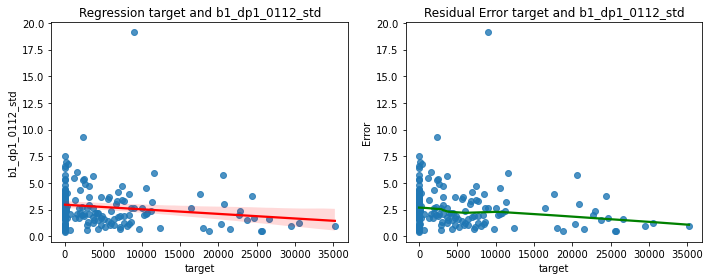

b1_dp1_0112_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0007281123700478855
intersept:  21.486471250287504
r2:  -0.3719140404523528
P_value:  7.468191956376714e-07
std error:  0.00014147733035660466


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


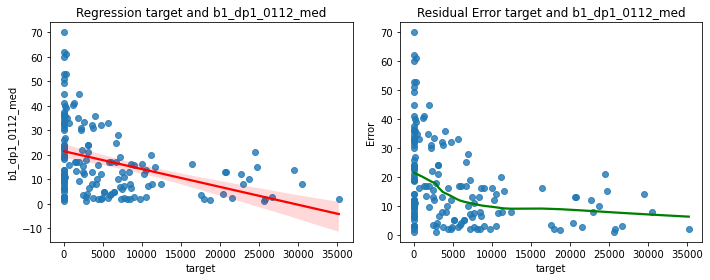

b2_dp1_0112_min
slope:  0.0012301740394340538
intersept:  14.320485384776875
r2:  0.5974465461822528
P_value:  1.5570068653148736e-17
std error:  0.00012854360537341443


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


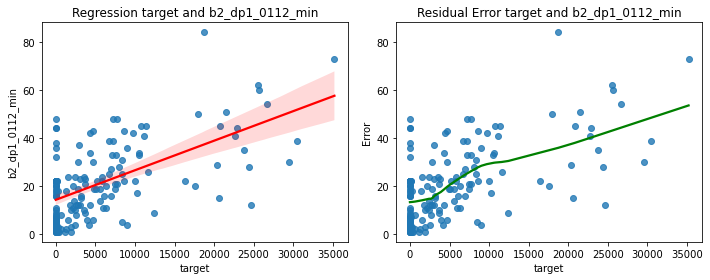

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0112_max
slope:  0.001597003529499349
intersept:  19.545184676109002
r2:  0.6349724450921106
P_value:  3.1080906320271865e-20
std error:  0.00015126103512911332


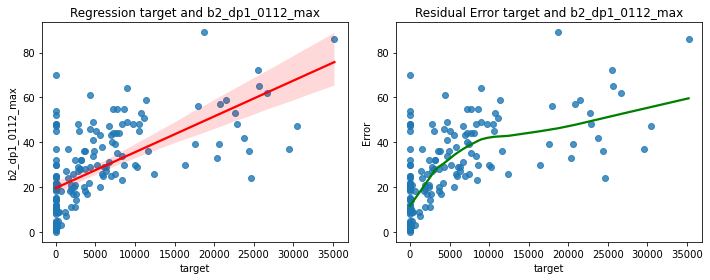

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0112_mean
slope:  0.0015654124278891637
intersept:  14.530292083401138
r2:  0.6549099925833312
P_value:  7.966530562207641e-22
std error:  0.00014062371580175875


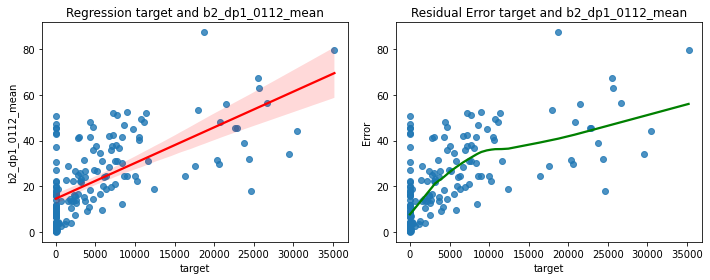

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0112_std
slope:  3.901351016003902e-05
intersept:  2.8363386837048523
r2:  0.12013890254702232
P_value:  0.1219880895064067
std error:  2.5097611517035804e-05


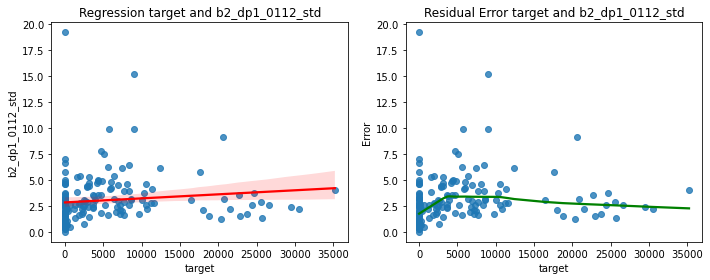

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0112_med
slope:  0.0015748086209186776
intersept:  14.561481219343122
r2:  0.6500719139765702
P_value:  1.9876158686720996e-21
std error:  0.000143306287486742


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


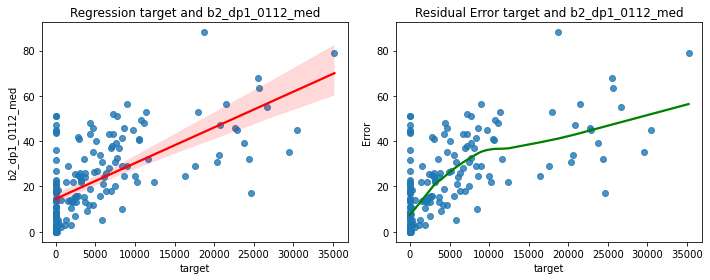

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dp1_0112_min
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.0007594477937176996
intersept:  55.52634387387175
r2:  -0.3607456123005237
P_value:  1.675285411449151e-06
std error:  0.0001528552026786998


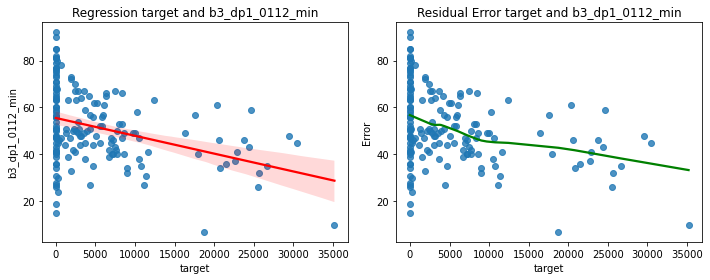

b3_dp1_0112_max
slope:  -0.0008932112249223908
intersept:  68.61489417230452
r2:  -0.41739074194053
P_value:  2.0042827535797825e-08
std error:  0.00015139198205533285


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


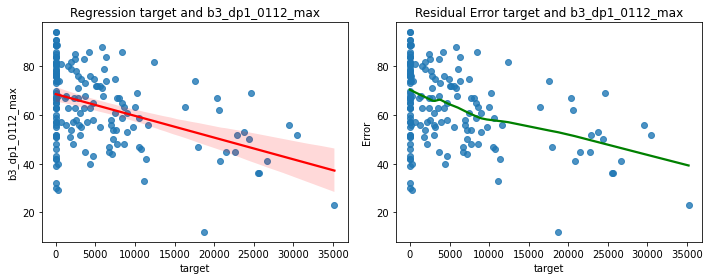

b3_dp1_0112_mean
slope:  -0.0008443563409862696
intersept:  62.342907525398466
r2:  -0.3987077863947815
P_value:  9.464614402564786e-08
std error:  0.0001511942817655923


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


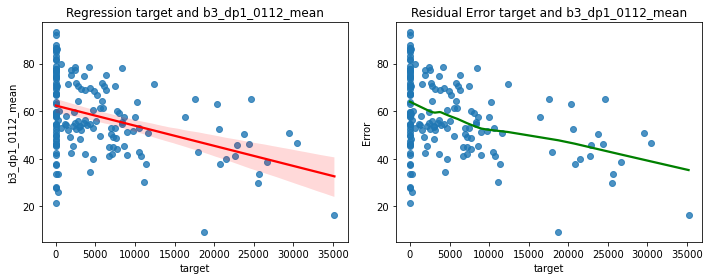

b3_dp1_0112_med
slope:  -0.0008517786088262991
intersept:  62.40018299107229
r2:  -0.3940396171989462
P_value:  1.3746349153031242e-07
std error:  0.00015466945040022142


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


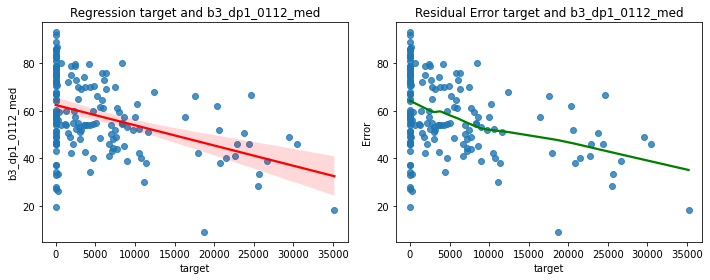

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dp1_0112_std
slope:  -4.262394813562325e-05
intersept:  3.9675703439623202
r2:  -0.13734502819759792
P_value:  0.07673457120892514
std error:  2.3931142967913758e-05


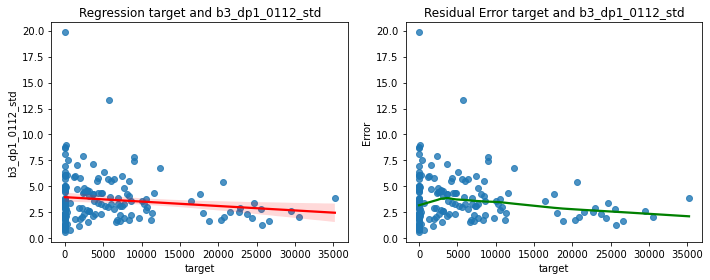

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0509_min
slope:  -0.0005413187399460265
intersept:  15.987223689236414
r2:  -0.319544484429242
P_value:  2.5615835428196604e-05
std error:  0.00012496593749187948


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


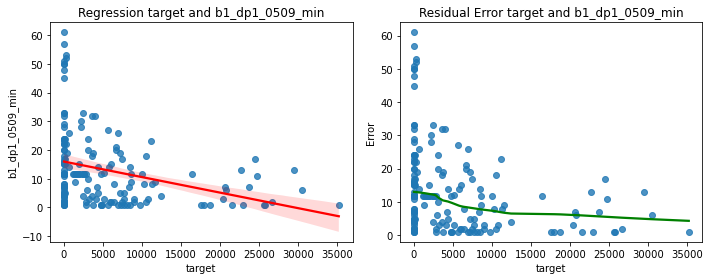

b1_dp1_0509_max
slope:  -0.0006689761471851404
intersept:  25.21166679995586
r2:  -0.3235486012898715
P_value:  1.9985136798303326e-05
std error:  0.00015230612905642446


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


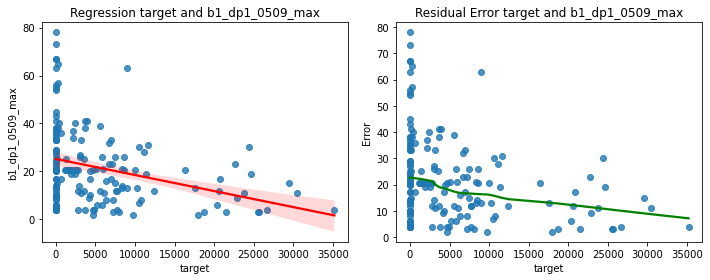

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0509_mean
slope:  -0.0006196141483888028
intersept:  20.507749917019662
r2:  -0.3326885385883782
P_value:  1.1191034974881025e-05
std error:  0.0001367319910722017


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


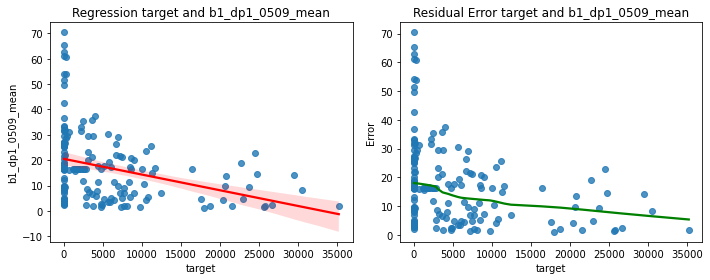

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dp1_0509_std
slope:  -3.928849547622085e-05
intersept:  2.7894477095857693
r2:  -0.13816512444922704
P_value:  0.07497354221258183
std error:  2.1925003062472985e-05


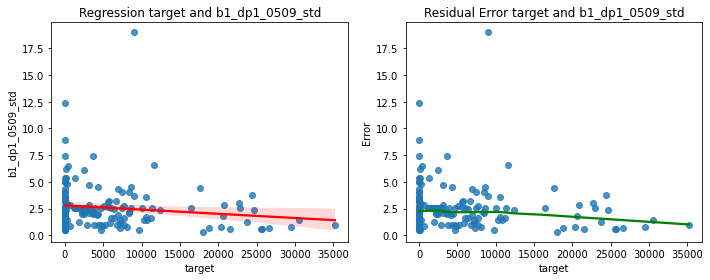

b1_dp1_0509_med
slope:  -0.0006299483685772854
intersept:  20.47984929986435
r2:  -0.33309213189077064
P_value:  1.09034290284139e-05
std error:  0.0001388230598018643


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


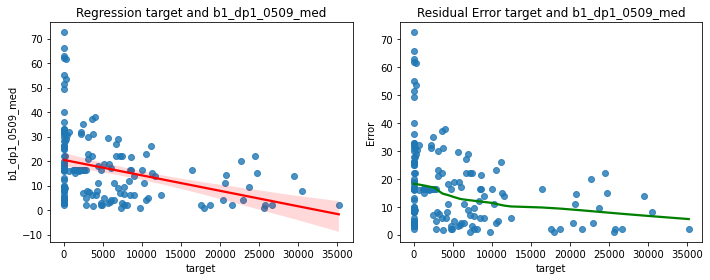

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0509_min
slope:  0.000984368948833557
intersept:  15.302651794957495
r2:  0.5549651010635211
P_value:  7.11340399506258e-15
std error:  0.0001148702636682617


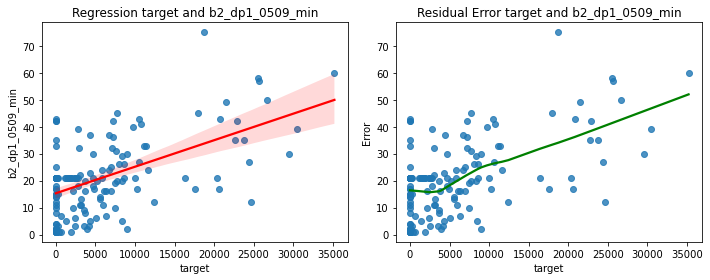

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0509_max
slope:  0.001552976898533811
intersept:  17.205951135890565
r2:  0.6361074395125761
P_value:  2.541119808192934e-20
std error:  0.00014665100602025962


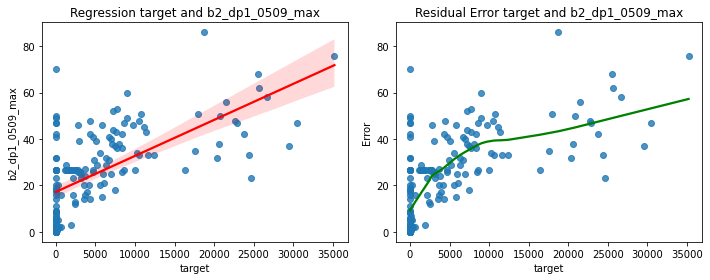

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0509_mean
slope:  0.0014474236954572966
intersept:  13.277927821399278
r2:  0.652769892406376
P_value:  1.196190546493343e-21
std error:  0.00013077010564380872


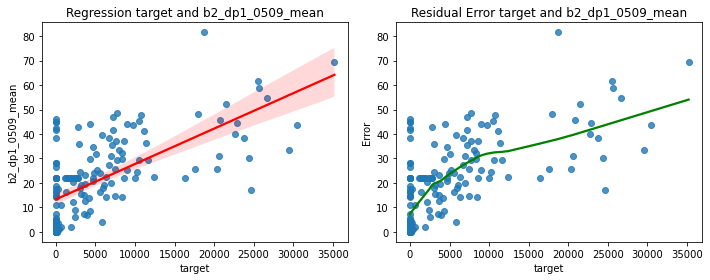

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0509_std
slope:  6.38417867589138e-05
intersept:  2.4261189748320007
r2:  0.181818332602871
P_value:  0.01869295114430946
std error:  2.687977467648641e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


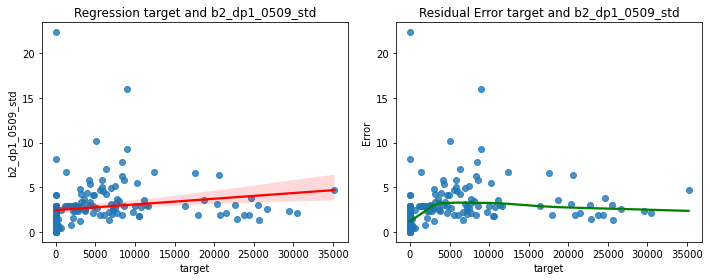

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dp1_0509_med
slope:  0.001459033229993279
intersept:  13.205308947363147
r2:  0.64969678375086
P_value:  2.132156427028274e-21
std error:  0.00013290356190442454


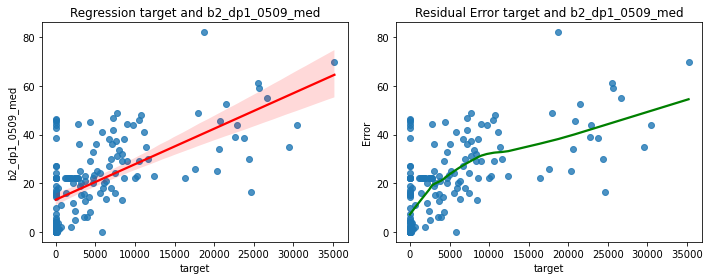

b3_dp1_0509_min
slope:  -0.0007961650140980536
intersept:  58.468770095232436
r2:  -0.34805426813312446
P_value:  4.045947594621205e-06
std error:  0.00016694505696089634


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


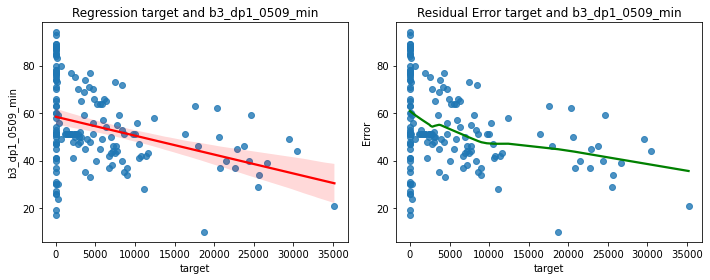

b3_dp1_0509_max
slope:  -0.0008265792179538782
intersept:  70.61569436367796
r2:  -0.38693815162750306
P_value:  2.3989228908654665e-07
std error:  0.0001533492476579719


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


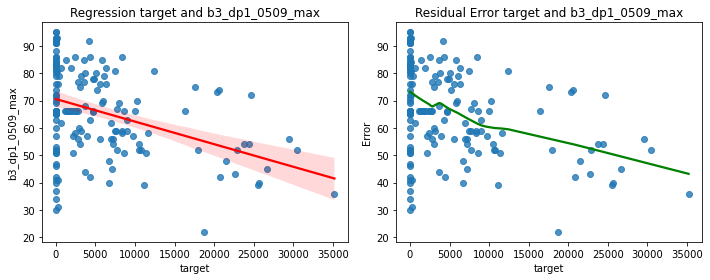

b3_dp1_0509_mean
slope:  -0.0008264839515812077
intersept:  64.72509060849951
r2:  -0.37696402950239355
P_value:  5.130844171973216e-07
std error:  0.0001580921842819365


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


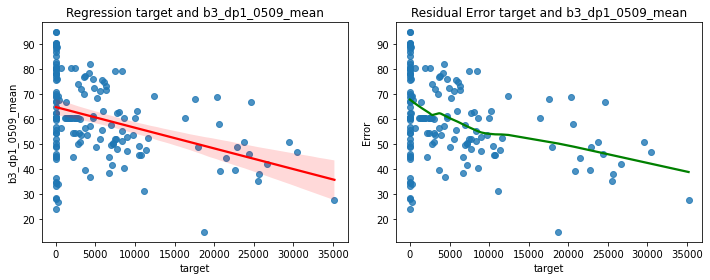

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dp1_0509_med
slope:  -0.000826460392564227
intersept:  64.59729931387454
r2:  -0.3725778035686807
P_value:  7.111226454856007e-07
std error:  0.00016025497475678215


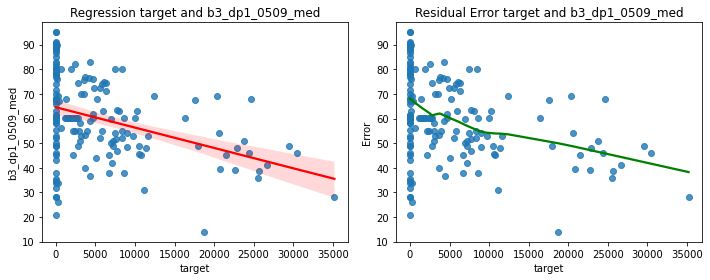

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dp1_0509_std
slope:  -7.367331241746882e-06
intersept:  3.596610582688253
r2:  -0.022295855331601534
P_value:  0.7748801038386143
std error:  2.5717936213730053e-05


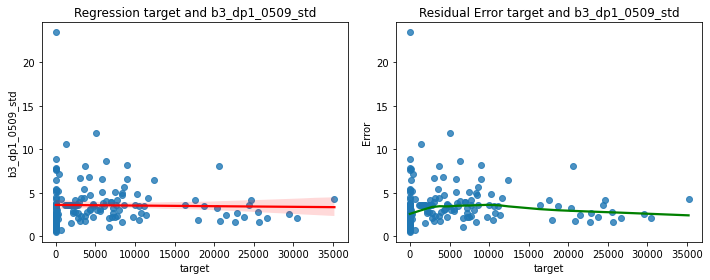

b1_dim_0305_min
slope:  -0.0006091418075668332
intersept:  13.465418145246485
r2:  -0.38390148294704385
P_value:  3.031803898088105e-07
std error:  0.00011406024889523668


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


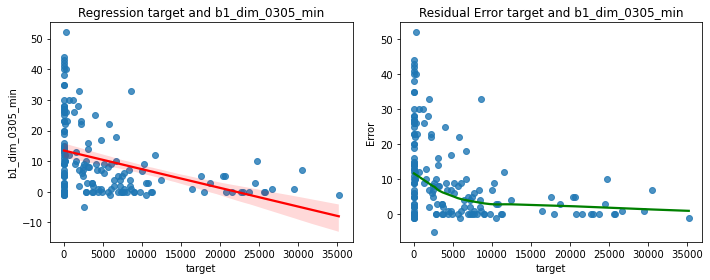

b1_dim_0305_max
slope:  -0.000814277148742854
intersept:  25.261698673588718
r2:  -0.38204836404062825
P_value:  3.493428688416412e-07
std error:  0.00015333835312666687


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


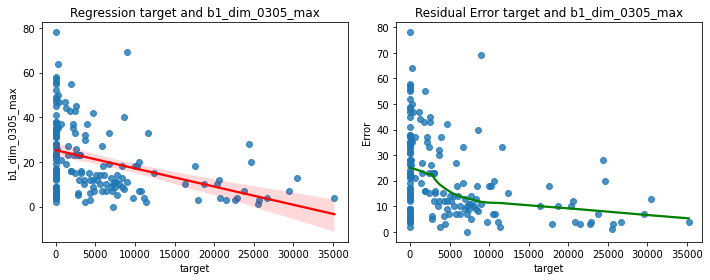

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0305_mean
slope:  -0.0007517239161079463
intersept:  19.38935696275479
r2:  -0.4123459727398744
P_value:  3.076612814636558e-08
std error:  0.00012929628433641755


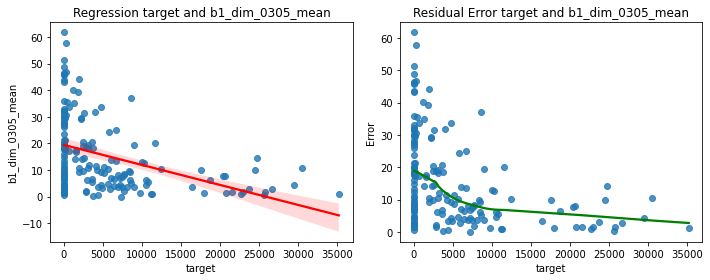

b1_dim_0305_med
slope:  -0.0007764515664428366
intersept:  19.475781908175176
r2:  -0.41907071614360475
P_value:  1.734992345966871e-08
std error:  0.00013096303701870201


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


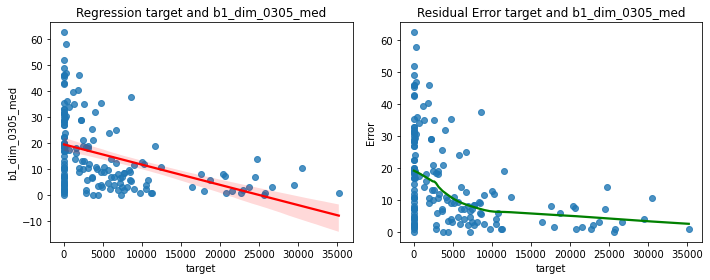

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0305_std
slope:  -5.0436561229912054e-05
intersept:  3.233781805226486
r2:  -0.15102673122510926
P_value:  0.051387906790612614
std error:  2.570037064479599e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


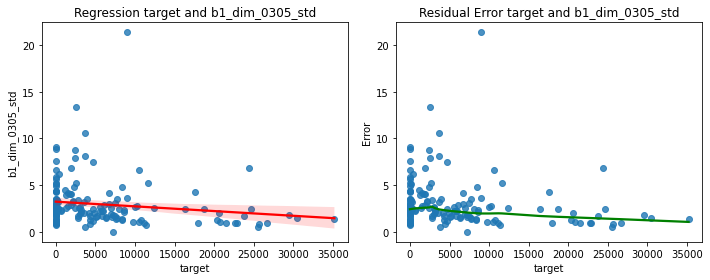

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0305_min
slope:  0.0011635269411005256
intersept:  24.11699123010557
r2:  0.49638104808281147
P_value:  8.984700226696096e-12
std error:  0.00015841321639365862


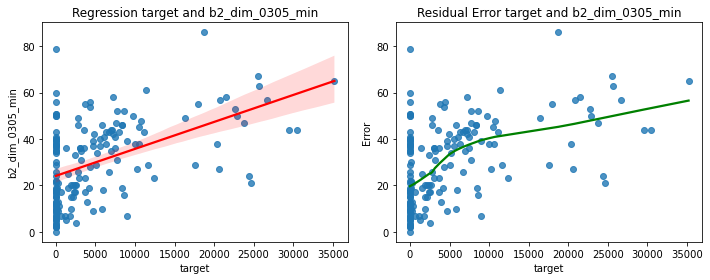

b2_dim_0305_max
slope:  0.0012863136160207462
intersept:  35.63513201066749
r2:  0.5259011140314629
P_value:  2.9187217125311673e-13
std error:  0.00016195653117066615


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


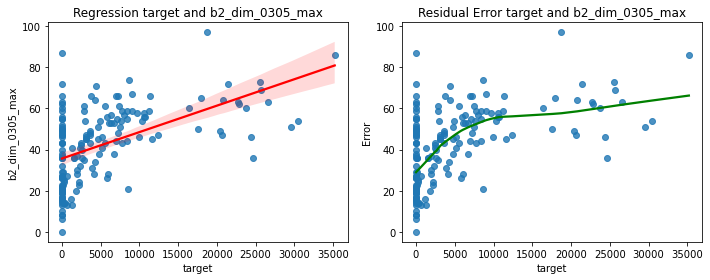

b2_dim_0305_mean
slope:  0.001262624610675917
intersept:  29.654373227006666
r2:  0.5313718173854272
P_value:  1.4902537865390668e-13
std error:  0.00015670696078527133


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


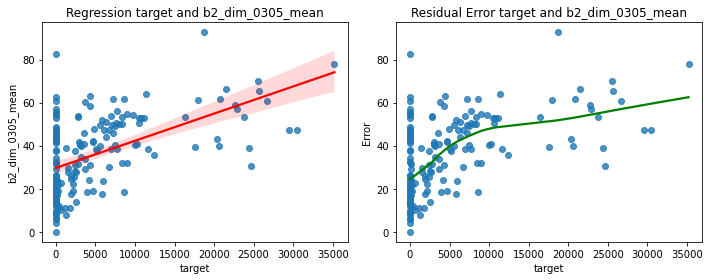

b2_dim_0305_med
slope:  0.001299959982256157
intersept:  29.48043402976635
r2:  0.5384988217891967
P_value:  6.095041551696417e-14
std error:  0.00015835735702633634


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


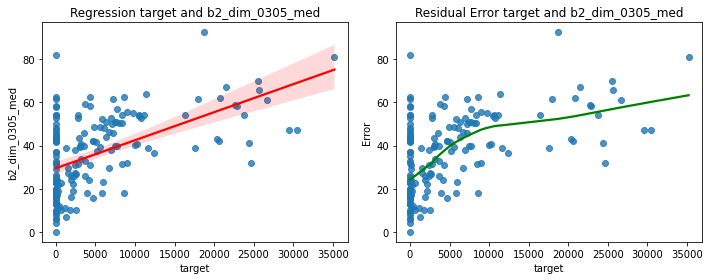

b2_dim_0305_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  3.453795413401287e-05
intersept:  3.229883087658002
r2:  0.11576605633394561
P_value:  0.13627571573004757
std error:  2.306978574919185e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


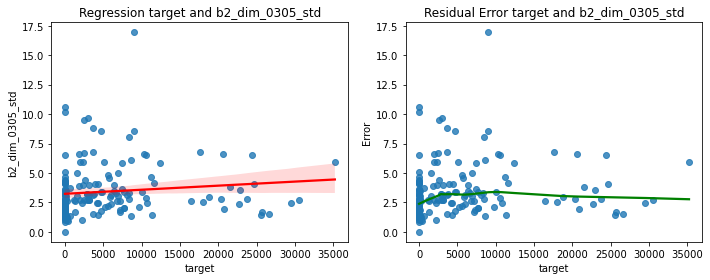

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0305_min
slope:  -0.00044301440012361494
intersept:  43.69292779243717
r2:  -0.30813592426465725
P_value:  5.0976690500776905e-05
std error:  0.00010648056917382493


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


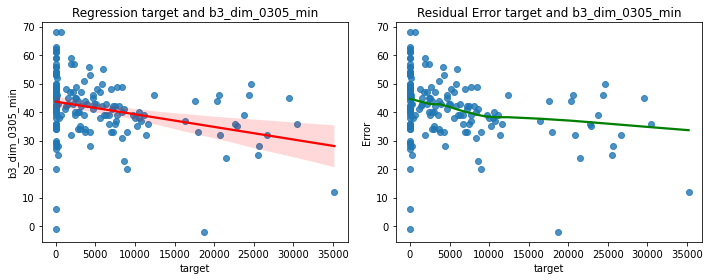

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0305_max
slope:  -0.0005783153293568023
intersept:  56.07887646690695
r2:  -0.39444578490391546
P_value:  1.331017062388203e-07
std error:  0.0001048848461095927


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


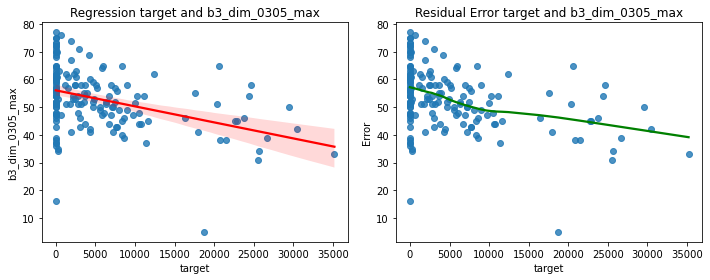

b3_dim_0305_mean
slope:  -0.0005124343236781374
intersept:  49.65380948741249
r2:  -0.36900358052439663
P_value:  9.245424470612612e-07
std error:  0.0001004804100934858


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


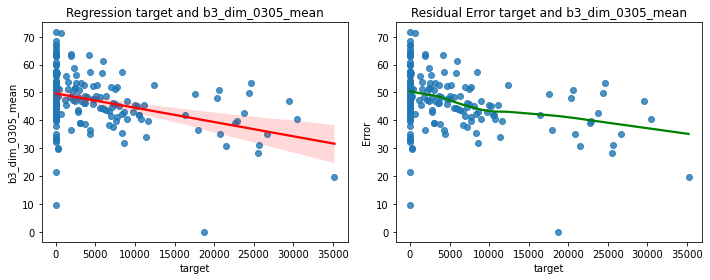

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0305_med
slope:  -0.0005161860977157925
intersept:  49.51732364789973
r2:  -0.3677192427669561
P_value:  1.015199569760017e-06
std error:  0.00010162520516387698


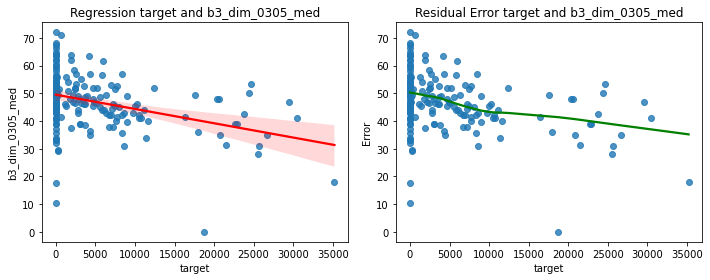

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0305_std
slope:  -3.127332854354885e-05
intersept:  3.285608026621419
r2:  -0.149047880481468
P_value:  0.054554411798415504
std error:  1.615206136295007e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


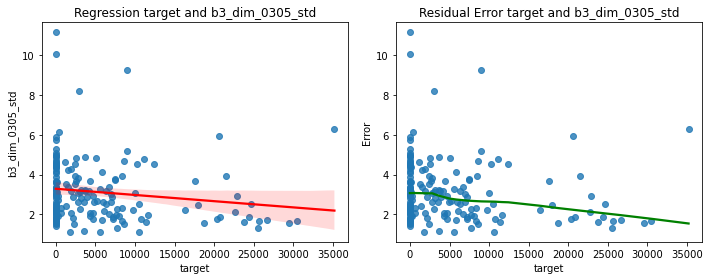

b1_dim_0608_min
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -0.0006351916180073961
intersept:  18.08312428622109
r2:  -0.36526513955747186
P_value:  1.2125225237873422e-06
std error:  0.0001260257343639997


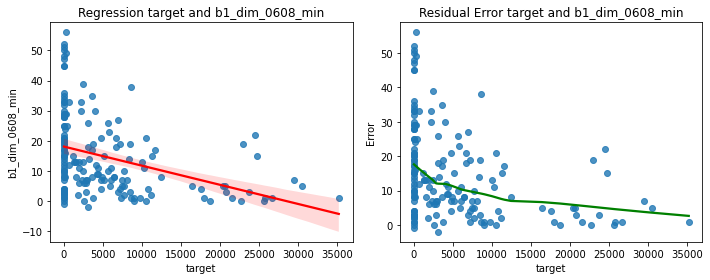

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0608_max
slope:  -0.0007310058287023834
intersept:  30.976505922613043
r2:  -0.3417043300768314
P_value:  6.2010356041507714e-06
std error:  0.00015651908321318735


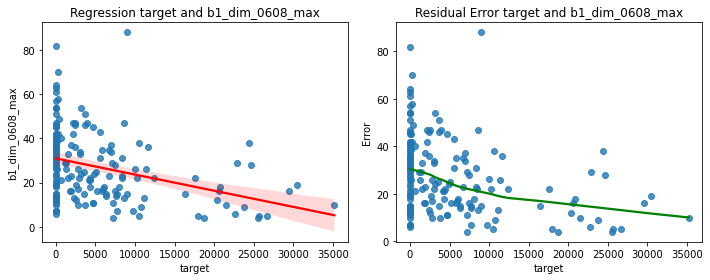

b1_dim_0608_mean
slope:  -0.00070928524136212
intersept:  24.330194123826317
r2:  -0.3822781656834588
P_value:  3.4327302619159736e-07
std error:  0.00013347307251123224


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


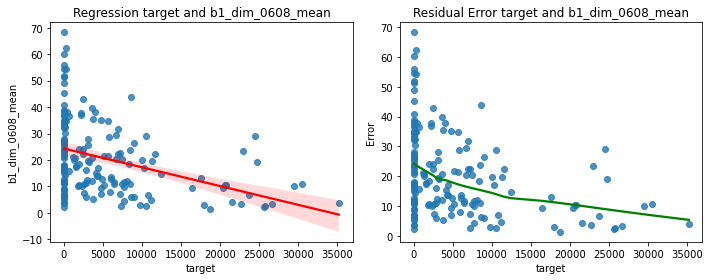

b1_dim_0608_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.000724994924749834
intersept:  24.364390108285075
r2:  -0.3874510345179467
P_value:  2.3053704194724887e-07
std error:  0.00013429362821312387


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


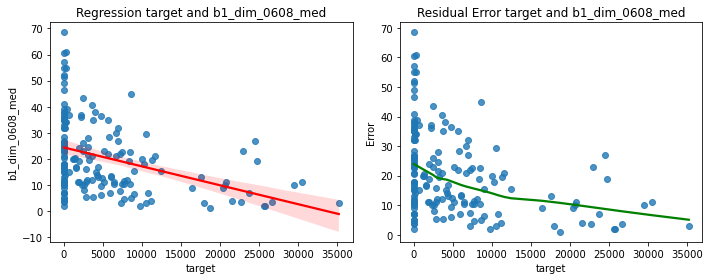

b1_dim_0608_std
slope:  -3.130702719651507e-05
intersept:  3.570573702044351
r2:  -0.08170383319023987
P_value:  0.29386899552651036
std error:  2.9730553612344954e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


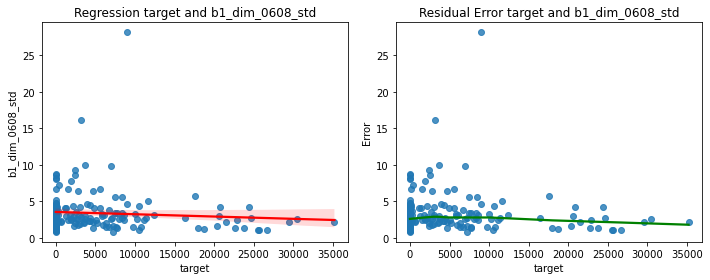

b2_dim_0608_min
slope:  0.0011048549377027927
intersept:  11.81333217338625
r2:  0.6226063959038247
P_value:  2.6451288778413013e-19
std error:  0.00010810693898935313


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


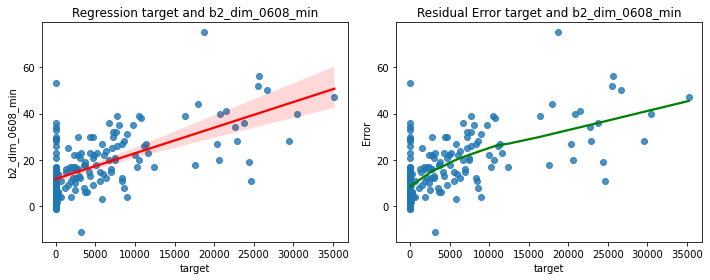

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0608_max
slope:  0.001337702297778416
intersept:  20.7577668597011
r2:  0.6371835483333754
P_value:  2.097770697626042e-20
std error:  0.00012596361580406392


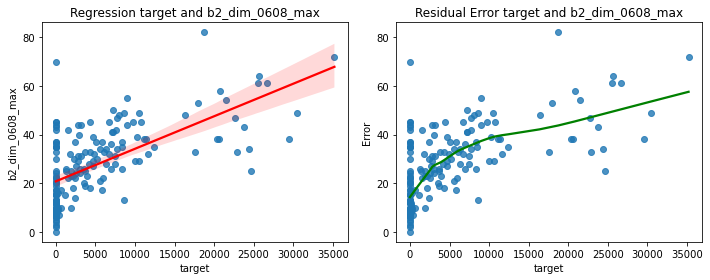

b2_dim_0608_mean
slope:  0.001241986116341305
intersept:  16.25985289717963
r2:  0.6541602148614551
P_value:  9.189220422790659e-22
std error:  0.00011179359018859918


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


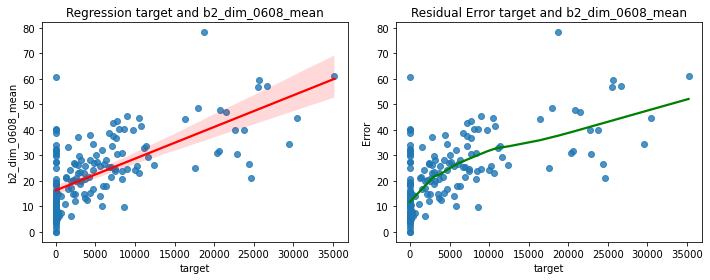

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0608_med
slope:  0.0012521273391555602
intersept:  16.26103944236377
r2:  0.6564210349173172
P_value:  5.967122032496335e-22
std error:  0.00011202699549367517


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


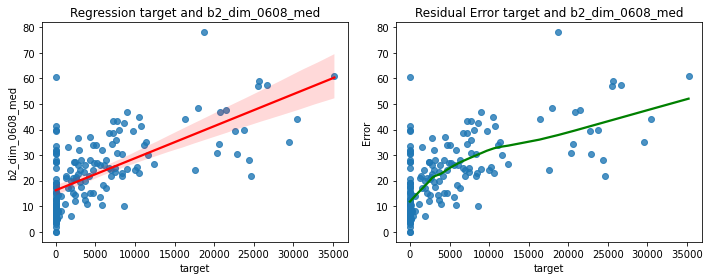

b2_dim_0608_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  5.946445628946489e-05
intersept:  2.5024717849169127
r2:  0.21111257461628236
P_value:  0.0061697527648419265
std error:  2.1433897593951798e-05


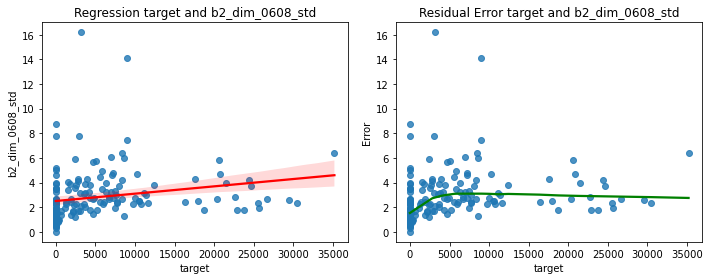

b3_dim_0608_min
slope:  -0.00047759743930019595
intersept:  51.96515949006493
r2:  -0.2809643753337217
P_value:  0.00023510923937213377
std error:  0.0001270025643680315


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


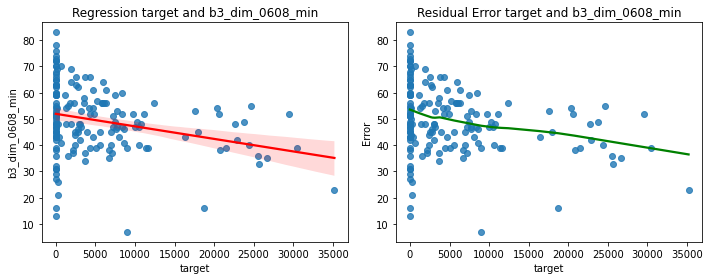

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0608_max
slope:  -0.0006228441567048461
intersept:  64.33616087346714
r2:  -0.37664046236127485
P_value:  5.256748148525957e-07
std error:  0.0001192586853240841


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


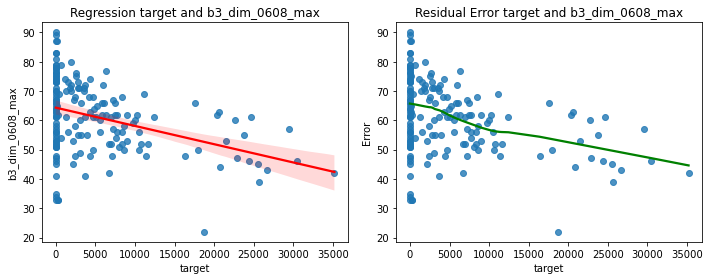

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0608_mean
slope:  -0.0005364976988124911
intersept:  58.109129563593534
r2:  -0.3325306238601488
P_value:  1.1305508351190935e-05
std error:  0.00011845366868605504


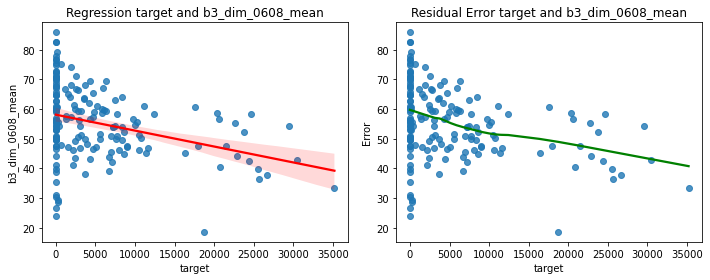

b3_dim_0608_med
slope:  -0.0005308064601451349
intersept:  58.03270160021283
r2:  -0.3259599565452773
P_value:  1.718099870057845e-05
std error:  0.000119849997627024


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


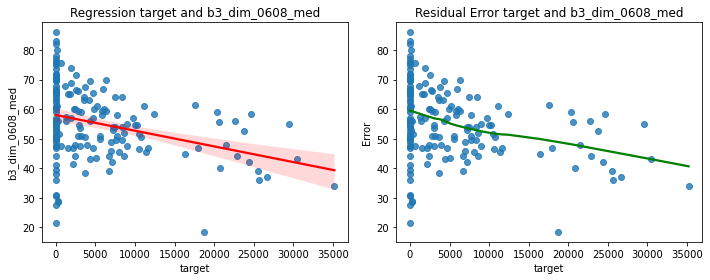

b3_dim_0608_std
slope:  -4.051817218185587e-05
intersept:  3.385491853323223
r2:  -0.16020764303141696
P_value:  0.03862432926102859
std error:  1.943472779940183e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


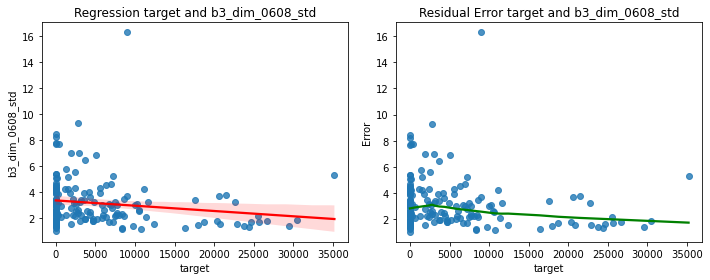

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0911_min
slope:  -0.0008349938689805985
intersept:  21.946088594211165
r2:  -0.44462431280342624
P_value:  1.7488733826298553e-09
std error:  0.00013095406956836655


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


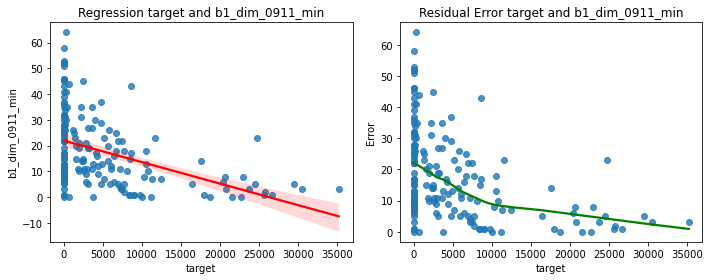

b1_dim_0911_max


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0009020663951575743
intersept:  33.876877212357186
r2:  -0.40806799824354195
P_value:  4.400592983312704e-08
std error:  0.00015711285431569078


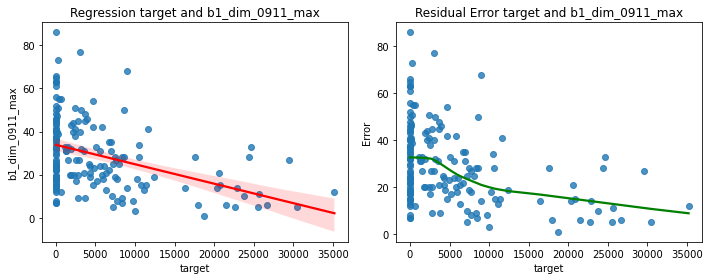

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0911_mean
slope:  -0.0009000632906376989
intersept:  27.92166940549112
r2:  -0.4525704469827483
P_value:  8.235294593819054e-10
std error:  0.00013806309591752304


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


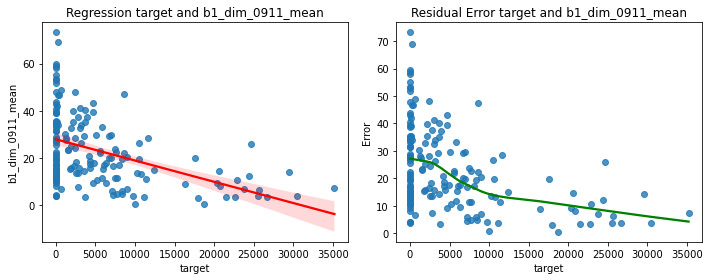

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b1_dim_0911_med
slope:  -0.0009236710331456704
intersept:  27.997516032408466
r2:  -0.45919731805650366
P_value:  4.3291867092790206e-10
std error:  0.00013910810639505643


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


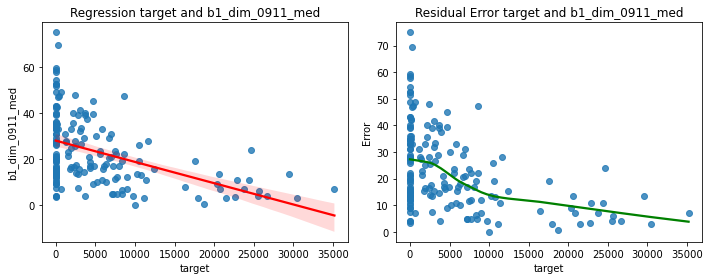

b1_dim_0911_std
slope:  -1.3678724804130348e-05
intersept:  3.207087979494348
r2:  -0.04144162219400269
P_value:  0.5948992450470041
std error:  2.567400621593496e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


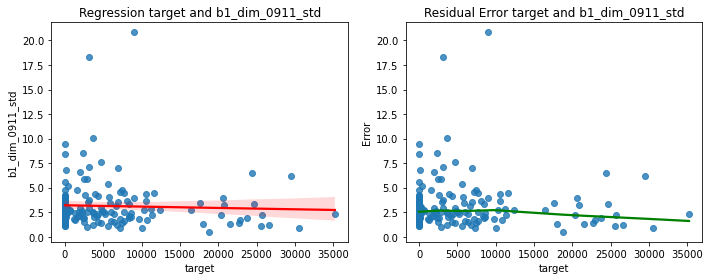

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0911_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0011014941344470366
intersept:  11.040853996762044
r2:  0.6676882180278455
P_value:  6.558285444472225e-23
std error:  9.560856587997794e-05


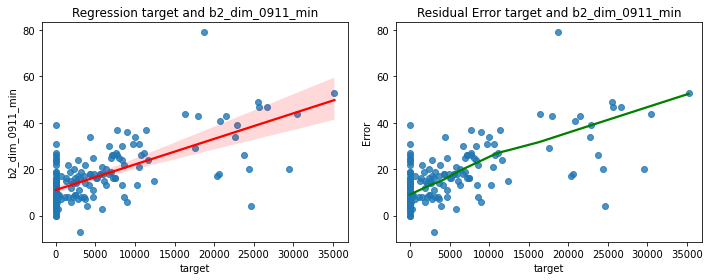

b2_dim_0911_max
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 0.001304443508779386
intersept:  18.227321856313324
r2:  0.6739785259194168
P_value:  1.8323165549486984e-23
std error:  0.00011131028354423219


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


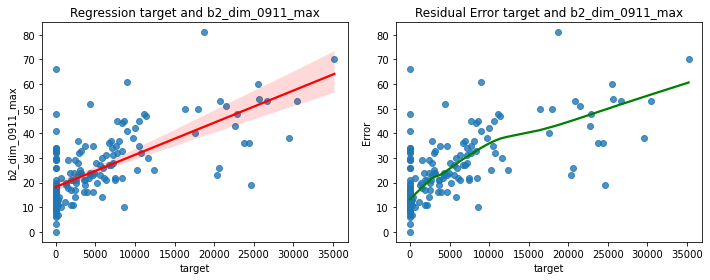

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0911_mean
slope:  0.001213682156694344
intersept:  14.541272092961652
r2:  0.6923439405376651
P_value:  3.6740996953193406e-25
std error:  9.847322274748955e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


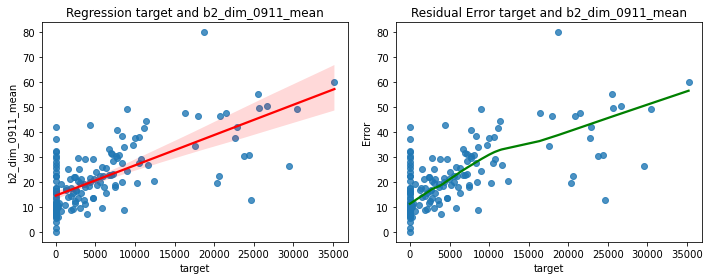

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_0911_med
slope:  0.0012239338020049722
intersept:  14.5797178722859
r2:  0.688592106605966
P_value:  8.360368394588017e-25
std error:  0.0001003416186808557


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


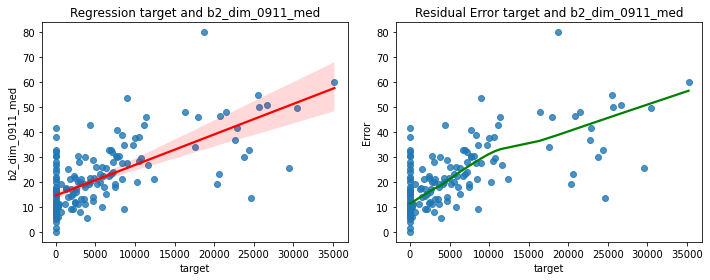

b2_dim_0911_std


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  5.217924796521055e-05
intersept:  2.028735798871205
r2:  0.19810116091115465
P_value:  0.010279341645043223
std error:  2.0099042091274583e-05


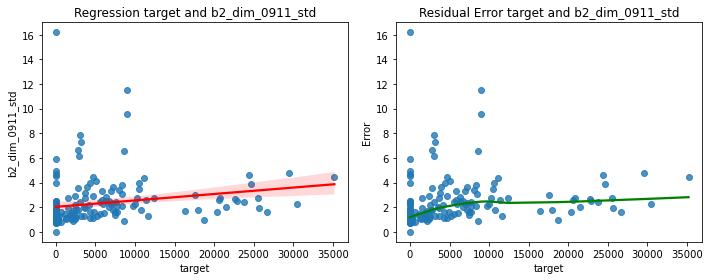

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0911_min
slope:  -0.00026496342117576256
intersept:  50.37017119438799
r2:  -0.15227580379454303
P_value:  0.04946879465116937
std error:  0.00013388088075622597


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


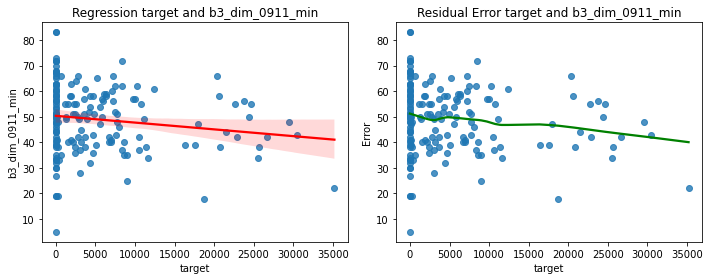

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0911_max
slope:  -0.00032037236511277224
intersept:  61.754033950348024
r2:  -0.19578789806840793
P_value:  0.011221522184737402
std error:  0.0001249221960789388


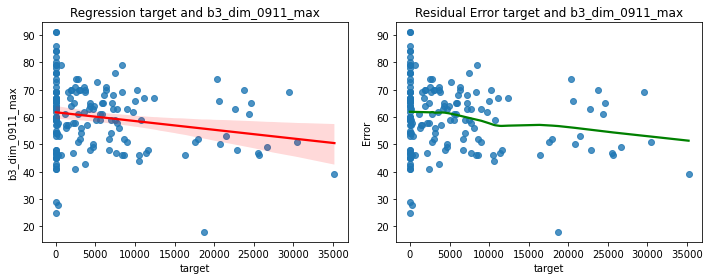

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0911_mean
slope:  -0.00030941886895796656
intersept:  56.182908335865804
r2:  -0.18821547380145007
P_value:  0.014858005117253915
std error:  0.00012569484974213596


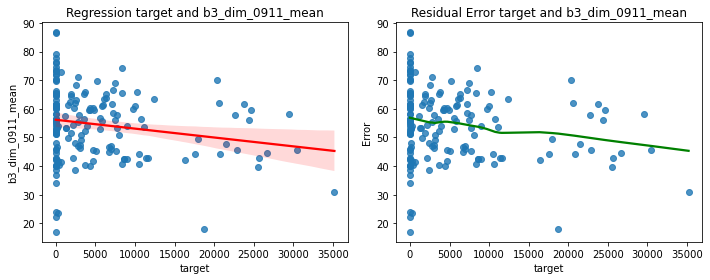

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_0911_med
slope:  -0.00031261031241312353
intersept:  56.090088048399274
r2:  -0.18715880160027104
P_value:  0.015439638977977689
std error:  0.00012773453600318791


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


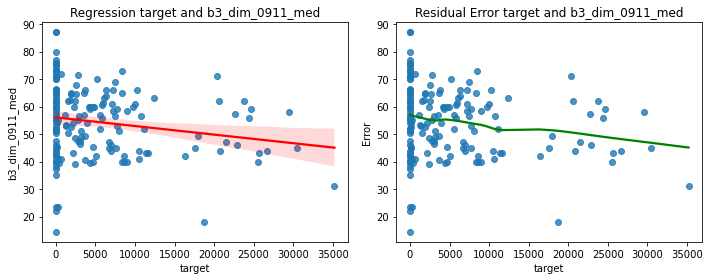

b3_dim_0911_std
slope:  -1.933956475330281e-05
intersept:  3.1595149130807676
r2:  -0.07871300161659545
P_value:  0.3119562071916109
std error:  1.9068155175504026e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


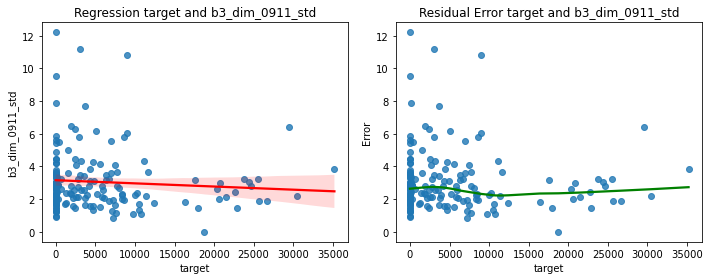

b1_dim_1202_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0005912085614759533
intersept:  15.036037835651076
r2:  -0.35892806104466835
P_value:  1.90523479909996e-06
std error:  0.00011968588807036252


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


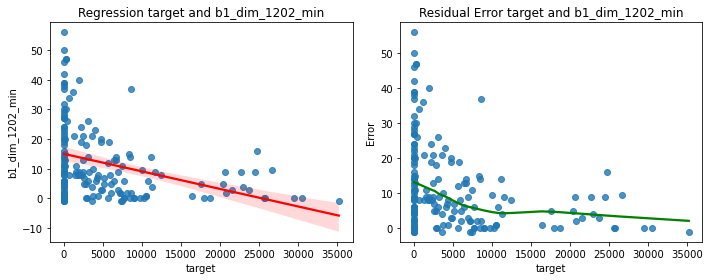

b1_dim_1202_max
slope:  -0.0007071631809891105
intersept:  26.504560575203403
r2:  -0.3639898217752325
P_value:  1.3289996066029883e-06
std error:  0.0001408724366630985


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


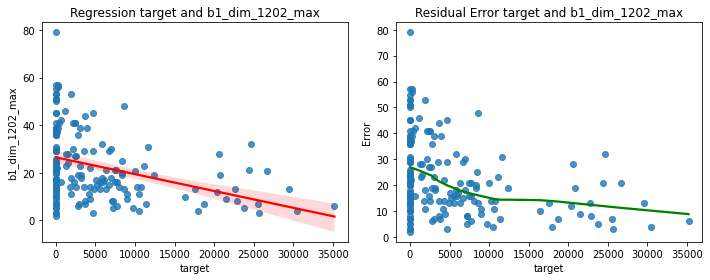

b1_dim_1202_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  -0.0006665854883636988
intersept:  20.781230713398205
r2:  -0.37650441227544756
P_value:  5.310563671796746e-07
std error:  0.0001276877718921936


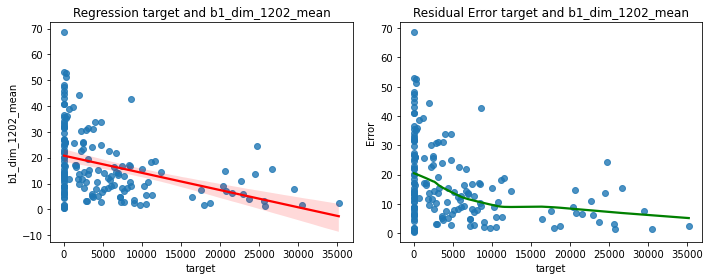

b1_dim_1202_med
slope:  -0.0006789328645205003
intersept:  20.836606023390143
r2:  -0.37772774751622457
P_value:  4.844997164174515e-07
std error:  0.00012956207395301955


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


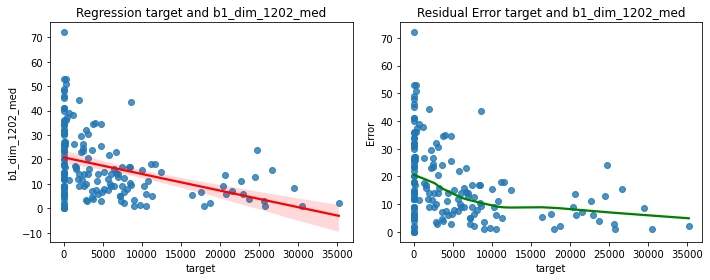

b1_dim_1202_std
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -3.1814150151628704e-05
intersept:  3.1722598421092636
r2:  -0.13383511864304085
P_value:  0.08465252895040251
std error:  1.83393316307779e-05


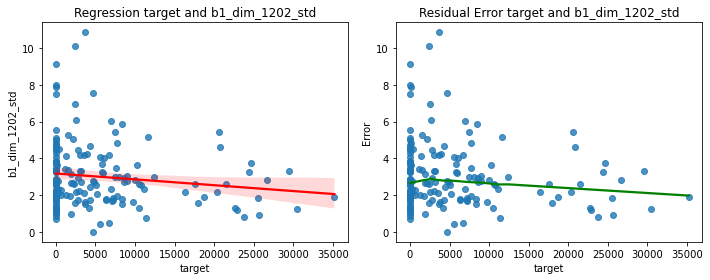

b2_dim_1202_min


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0009880693789333932
intersept:  26.668328862030062
r2:  0.4107451911566869
P_value:  3.519584598647589e-08
std error:  0.00017074533133692223


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


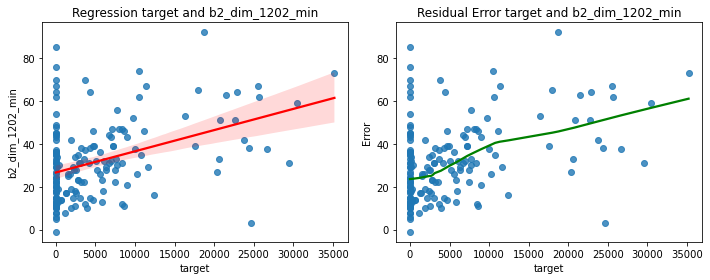

b2_dim_1202_max
slope:  0.001071323641411382
intersept:  37.30275820335392
r2:  0.42782341996013235
P_value:  8.076566496056646e-09
std error:  0.00017620427910538448


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


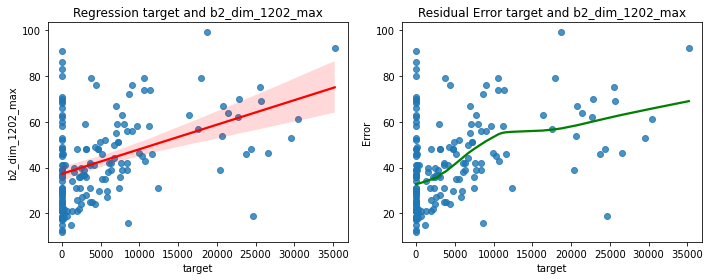

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b2_dim_1202_mean
slope:  0.0010466764173208674
intersept:  31.75818267881504
r2:  0.4301108288932184
P_value:  6.5898494272048815e-09
std error:  0.00017102915108981344


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


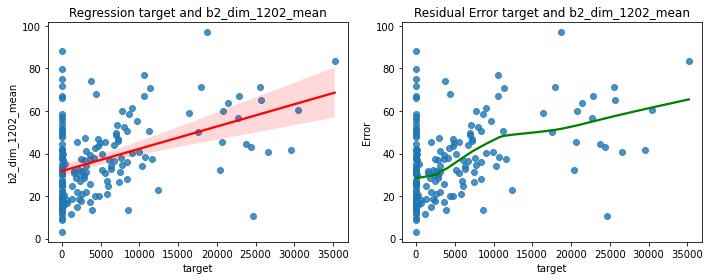

b2_dim_1202_med


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  0.0010532847466670813
intersept:  31.709014625543183
r2:  0.4298892469975744
P_value:  6.721447937779531e-09
std error:  0.00017221780794501017


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


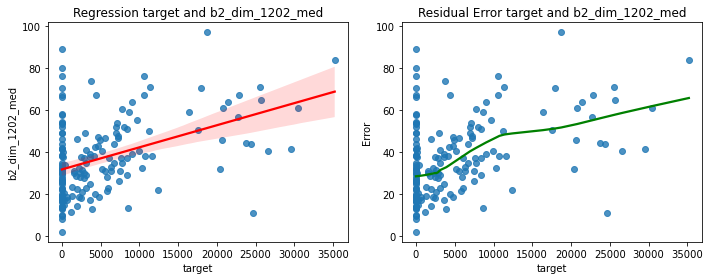

b2_dim_1202_std
slope:  2.492345005838635e-05
intersept:  2.955258603785153
r2:  0.096718438770538
P_value:  0.21371781944254994
std error:  1.996714884328712e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


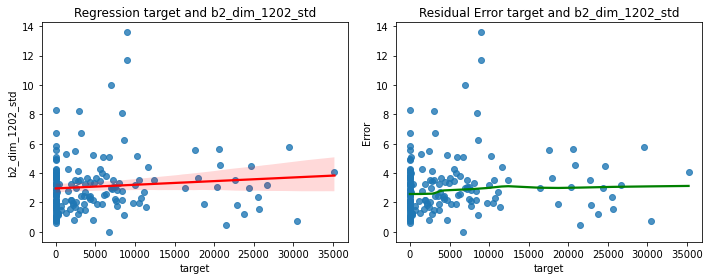

b3_dim_1202_min
slope:  -0.000324668046734653
intersept:  39.980316020410136
r2:  -0.180649661549136
P_value:  0.019479340576153928
std error:  0.00013761182867207984


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


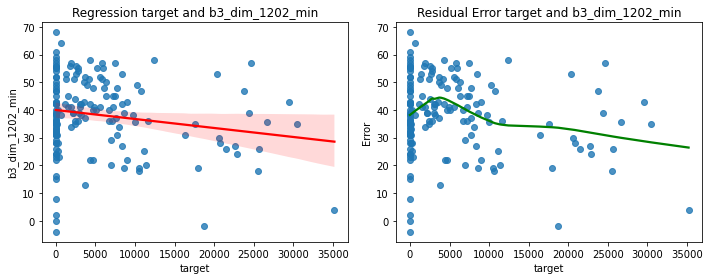

b3_dim_1202_max
slope:  -0.00044647618829197675
intersept:  52.31169953439836
r2:  -0.2418790382397233
P_value:  0.001637265313333992
std error:  0.0001394334577512362


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


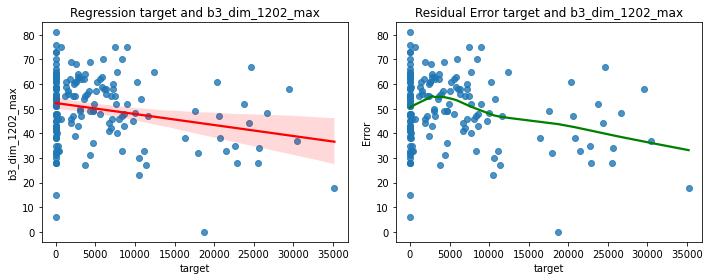

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_1202_mean
slope:  -0.00037918071152206627
intersept:  46.10670255920029
r2:  -0.2154570885379777
P_value:  0.005168720526076464
std error:  0.00013378938115617302


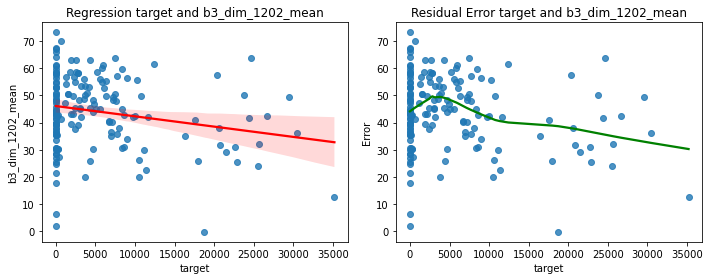

b3_dim_1202_med
slope:  -0.00037657006801794344
intersept:  45.956587784684615
r2:  -0.21079124795549173
P_value:  0.006250243878632952
std error:  0.0001359508203644625


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


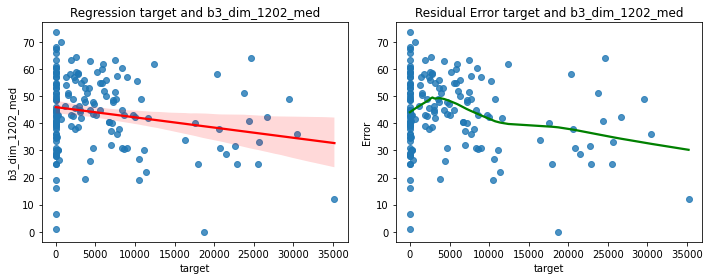

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


b3_dim_1202_std
slope:  -2.622479644606932e-05
intersept:  3.3492351393198216
r2:  -0.1065957368283475
P_value:  0.17034884986417553
std error:  1.904359007847713e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


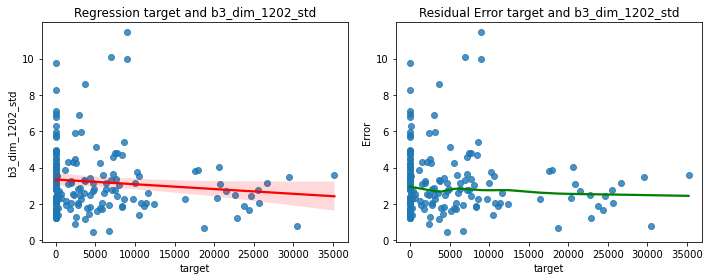

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


rain_d_mean
slope:  5.10223119979063e-07
intersept:  0.006274400330354125
r2:  0.07439360792903431
P_value:  0.339334390602293
std error:  5.324482707732736e-07


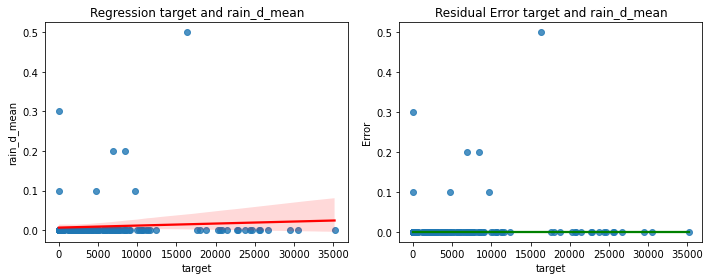

et_ma_mean
slope:  6.616761387818367e-05
intersept:  1.3838937807776321
r2:  0.32127390908920445
P_value:  2.3021574606321022e-05
std error:  1.5183494815440297e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


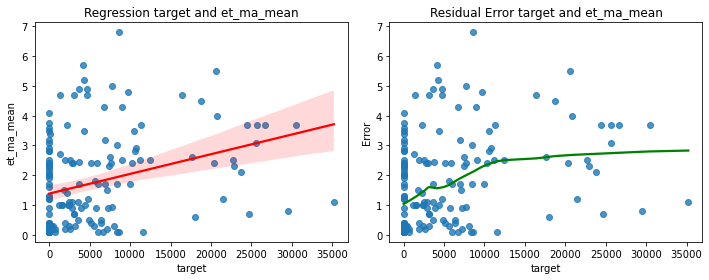

et_mp_mean
slope:  -3.147074133789969e-05
intersept:  7.67209773552128
r2:  -0.15996017175207897
P_value:  0.0389295835314434
std error:  1.5119053962522283e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


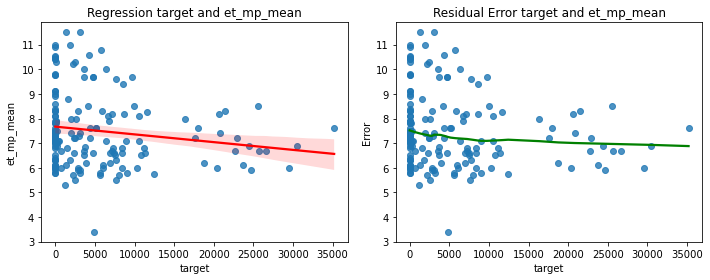

et_mw_mean


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  1.755228356008324e-05
intersept:  4.5212253651710315
r2:  0.10974455115626626
P_value:  0.1580005614659564
std error:  1.2375920718213953e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


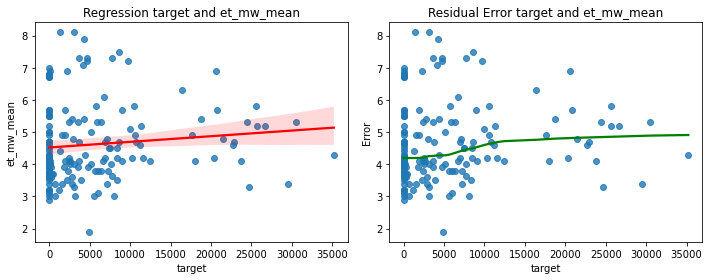

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


et_sc_mean
slope:  -2.0092919467165895e-05
intersept:  4.97070031329451
r2:  -0.1605830029754992
P_value:  0.03816517347209708
std error:  9.614539293647428e-06


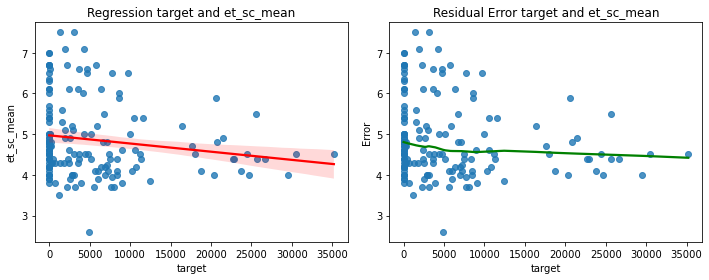

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


et_tc_mean
slope:  -3.964147170342944e-05
intersept:  6.802284251214401
r2:  -0.25787539036309015
P_value:  0.0007667032612416498
std error:  1.1562589992875063e-05


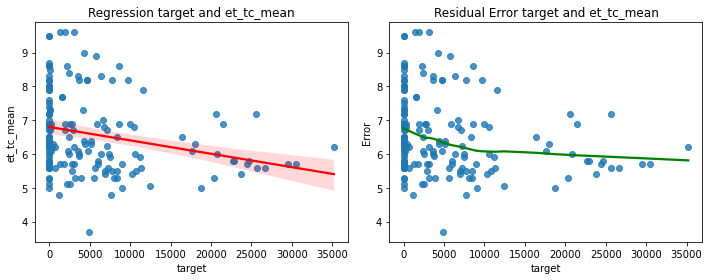

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


evp_ml_mean
slope:  4.958449055561074e-06
intersept:  4.866201632527885
r2:  0.03087631399779752
P_value:  0.6920257664295935
std error:  1.2496008708986496e-05


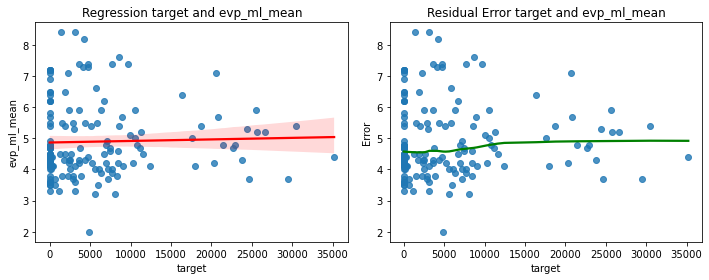

evp_s_mean
slope:  -4.994273817026082e-05
intersept:  6.7177291229858875
r2:  -0.24515486015117002
P_value:  0.0014071734168737016
std error:  1.5375543822117757e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


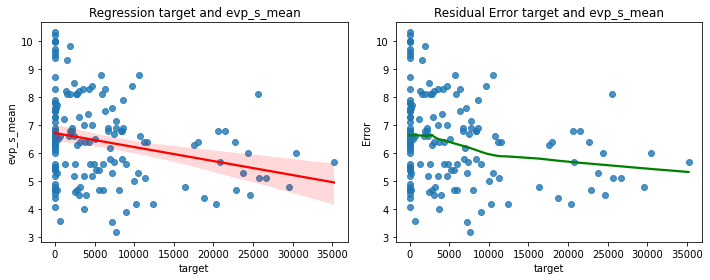

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


tmax_mean
slope:  5.165266364890138e-05
intersept:  31.07559190921209
r2:  0.08587470212139889
P_value:  0.2698316949691253
std error:  4.665285521613296e-05


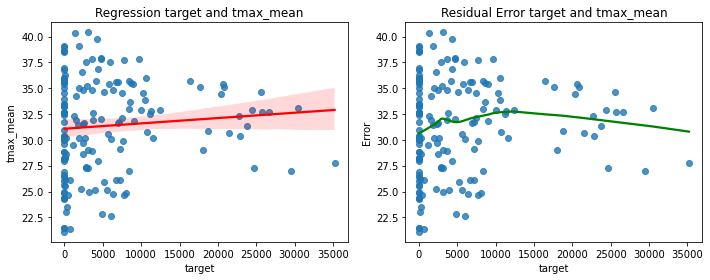

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


tmin_mean
slope:  0.00012482030903268495
intersept:  15.351080663525462
r2:  0.14834619336319396
P_value:  0.05571526572501761
std error:  6.477908932037797e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


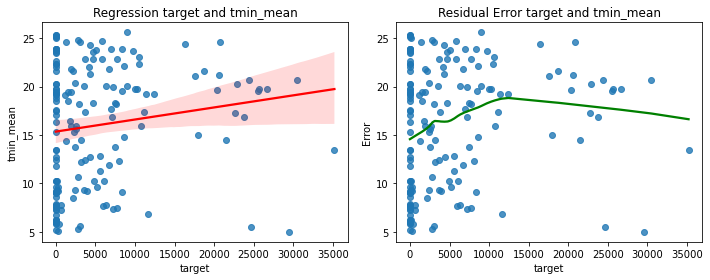

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


rain_m_mean
slope:  0.003575447740234678
intersept:  121.50077954409393
r2:  0.34882375587875614
P_value:  3.839477059665125e-06
std error:  0.0007478410250073657


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


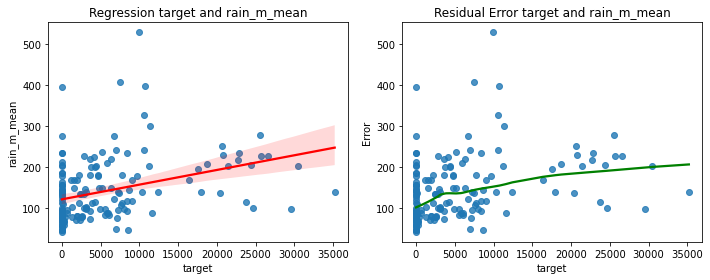

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


mslp_mean
slope:  -0.00010774572772940222
intersept:  1016.0795659841203
r2:  -0.2478748924985583
P_value:  0.001239004036779593
std error:  3.278356016460992e-05


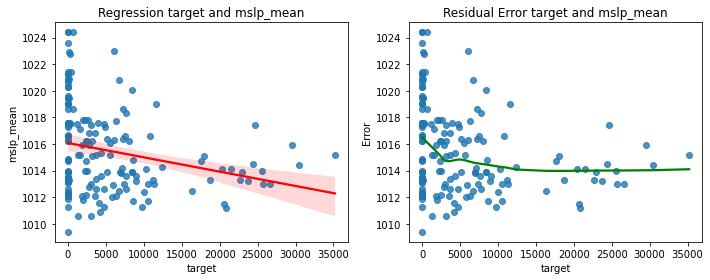

rad_mean
slope:  -4.532286158795056e-05
intersept:  20.112074786384664
r2:  -0.11686760596815048
P_value:  0.13256136389815384
std error:  2.9984372032509606e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


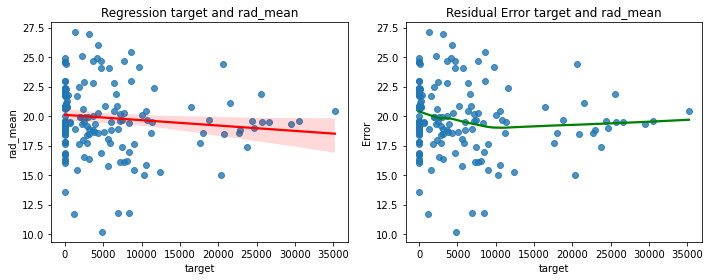

rh_tmax_mean
slope:  0.0005383581953389482
intersept:  3306.5529383312073
r2:  0.37592678526061535
P_value:  5.544965602618676e-07
std error:  0.00010330979976169929


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


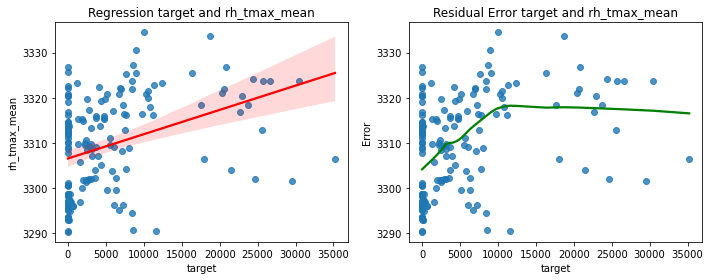

rh_tmin_mean
slope:  0.0008454927849847869
intersept:  3351.755381725683
r2:  0.36603391314287187
P_value:  1.1470806994434533e-06
std error:  0.0001673440837183991


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


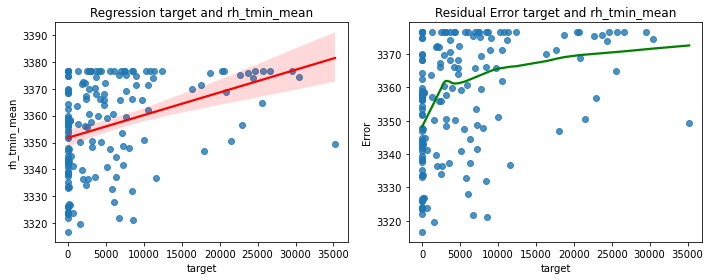

vp_mean
slope:  0.0002677619690629172
intersept:  14.646414687689555
r2:  0.2705109190891544
P_value:  0.00040674665403144357
std error:  7.418578896633898e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


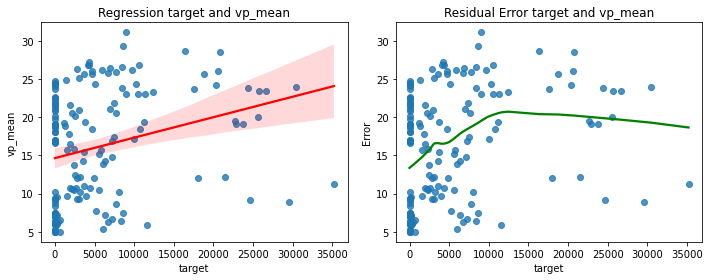

vp_d_mean
slope:  -0.000153358412721502
intersept:  22.72820873611879
r2:  -0.21432350515895185
P_value:  0.00541481295757
std error:  5.441077483161637e-05


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


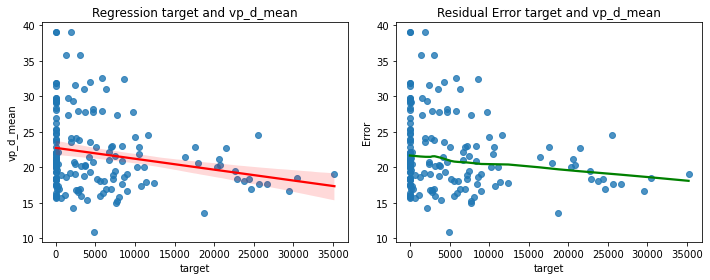

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio32m
slope:  -105.44580955035964
intersept:  14881290.349509008
r2:  -0.4814233671640092
P_value:  4.517312574923468e-11
std error:  14.945355651407828


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


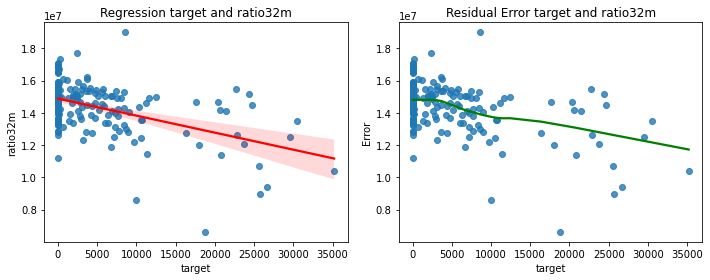

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio42m
slope:  804.2912900455935
intersept:  27593847.06507815
r2:  0.6630856501870043
P_value:  1.6350530067943548e-22
std error:  70.68362702371701


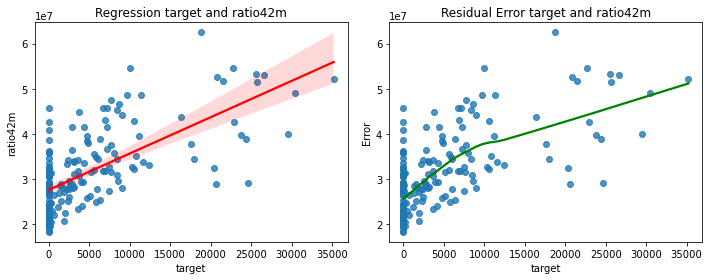

ratio43m
slope:  903.1322054020827
intersept:  18349920.834103156
r2:  0.644824285389117
P_value:  5.25952418482647e-21
std error:  83.3392059088857


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


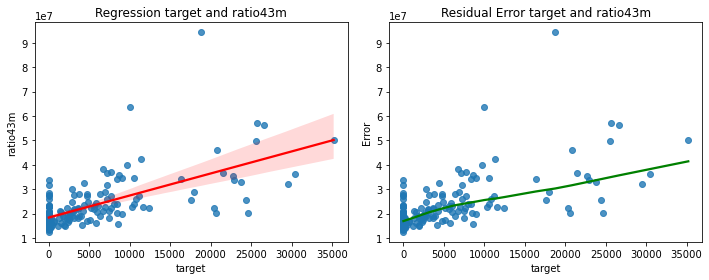

ratio52m
slope:  271.2381639158676
intersept:  34104152.01159019
r2:  0.2870397149886591
P_value:  0.00016925811937802446
std error:  70.46857299691656


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


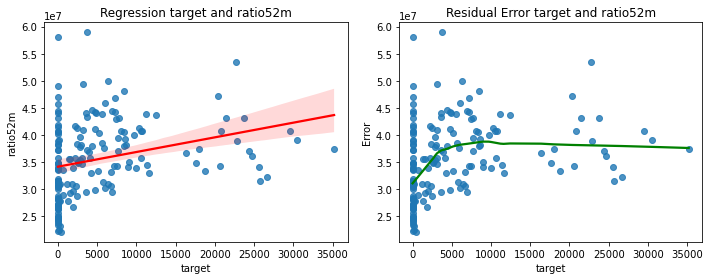

ratio53m
slope:  431.34649470199867
intersept:  22900648.1896558
r2:  0.5384761315783818
P_value:  6.112619789060175e-14
std error:  52.54849810853154


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


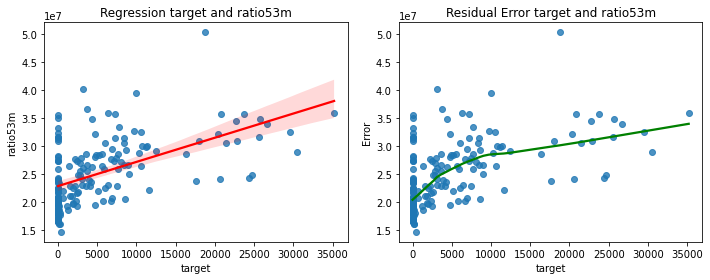

ratio54m
slope:  -146.39731543070138
intersept:  12341786.324489947
r2:  -0.5312472501464383
P_value:  1.5134428900769137e-13
std error:  18.17561106798723


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


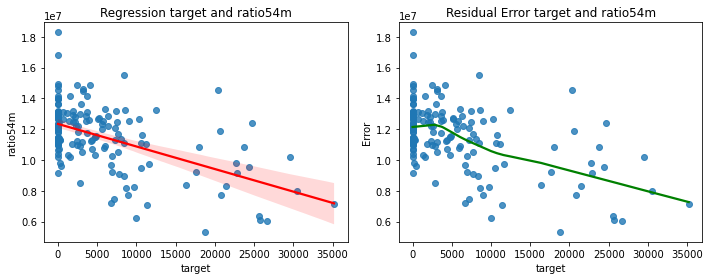

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ratio62m
slope: 

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 -62.15422405846381
intersept:  22848071.53467759
r2:  -0.09669470899103899
P_value:  0.21383073151242388
std error:  49.80651069843389


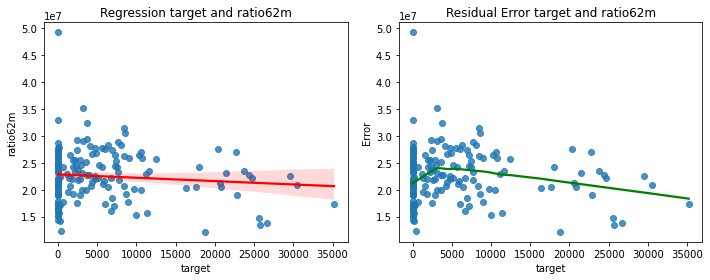

ratio63m


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  73.69228516597252
intersept:  15372588.48708902
r2:  0.18296995253867615
P_value:  0.01794510534526212
std error:  30.825217359443585


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


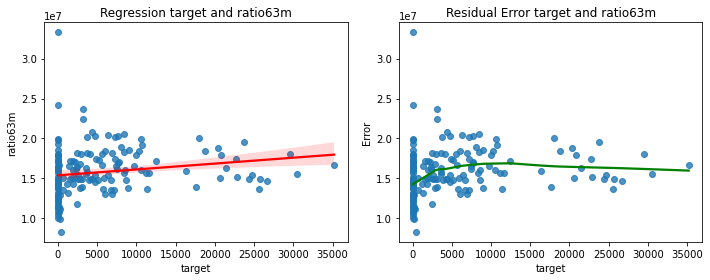

ratio64m
slope:  -156.6530487798713
intersept:  8370894.993718851
r2:  -0.5259441480878115
P_value:  2.903465441217606e-13
std error:  19.721562814244642


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


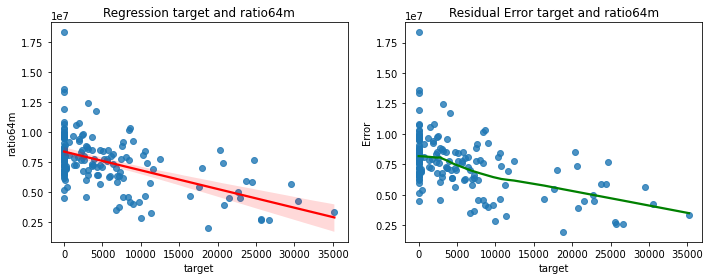

ratio65m
slope:  -66.74427487346479
intersept:  6753092.395253982
r2:  -0.4991733728613047
P_value:  6.588155058106084e-12
std error:  9.01966217019122


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


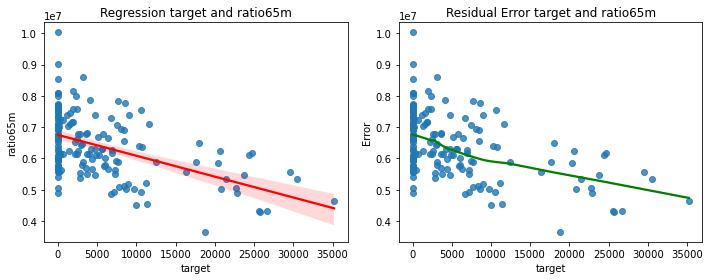

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GSAVIm


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope:  20.628857728038223
intersept:  2704506.550899214
r2:  0.3423234811914096
P_value:  5.950594382656679e-06
std error:  4.407895403663452


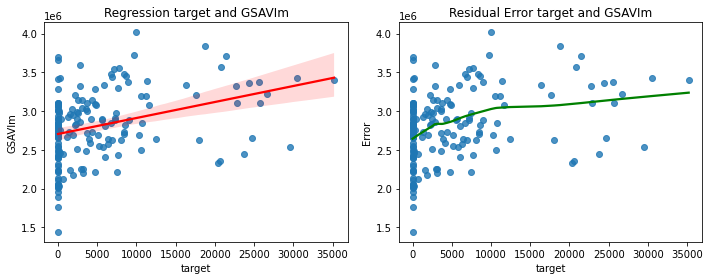

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GNDVIm
slope:  82.06204772918456
intersept:  4581071.00524528
r2:  0.6183004457414983
P_value:  5.45319385108742e-19
std error:  8.120658015544999


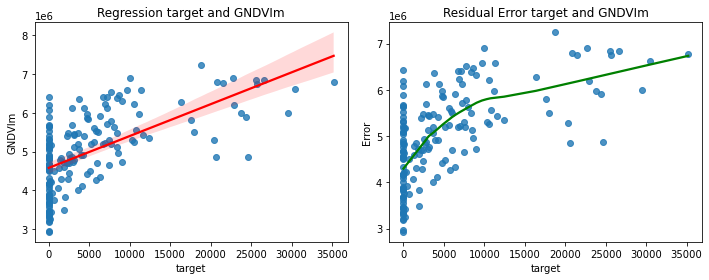

CVIm
slope:  660.768130881367
intersept:  41428087.23912954
r2:  0.4575802159801506
P_value:  5.071161521045753e-10
std error:  99.95945295873324


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


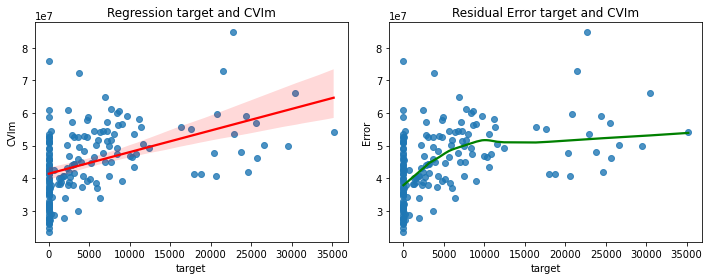

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NDGIm
slope:  41.17082478065869
intersept:  -1954903.4602262778
r2:  0.4908669960817002
P_value:  1.644453239938627e-11
std error:  5.688776060166833


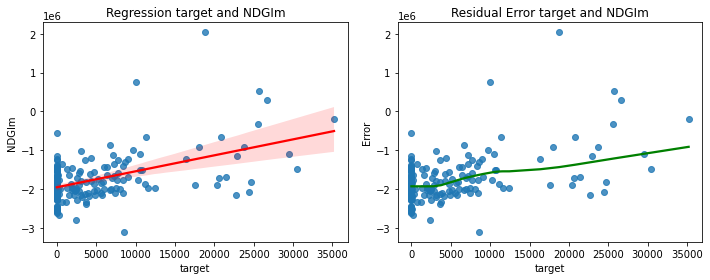

RIm
slope:  -41.17082478065869
intersept:  1954903.4602262778
r2:  -0.4908669960817002
P_value:  1.644453239938627e-11
std error:  5.688776060166833


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


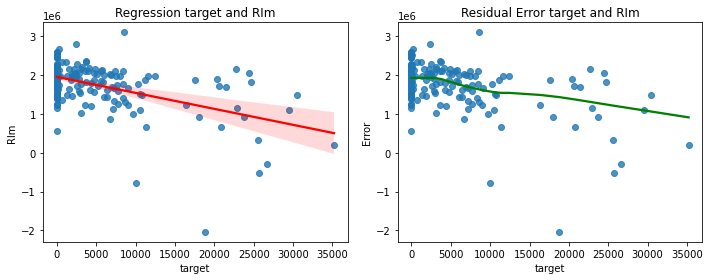

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NBRm
slope:  117.68559542809284
intersept:  964060.7339742641
r2:  0.5825889982513784
P_value:  1.4677326838967178e-16
std error:  12.781595662186932


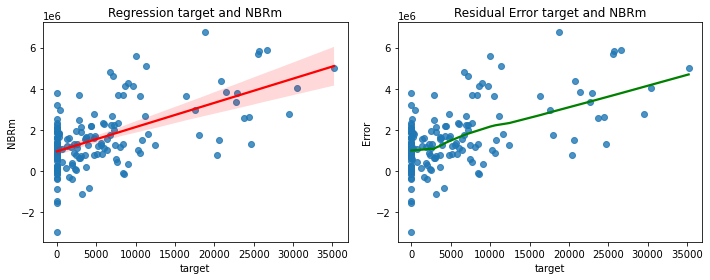

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NDIIm
slope:  73.83390407698353
intersept:  -1026241.0336164786
r2:  0.5658937992161472
P_value:  1.5995850760110092e-15
std error:  8.37448429702693


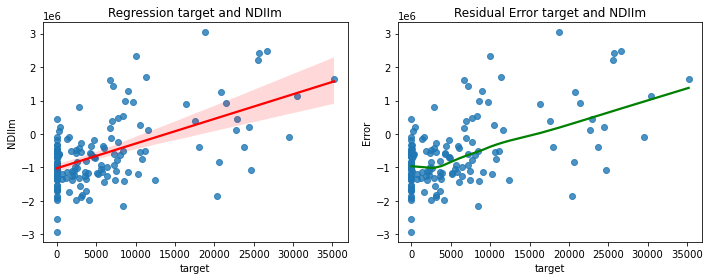

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


GDVIm
slope:  2.610298376139932
intersept:  1509483.0821041388
r2:  0.07335454780485154
P_value:  0.3461416353594612
std error:  2.762800567635263


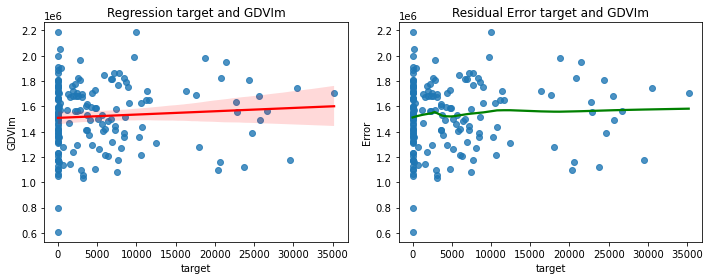

MSAVIm
slope:  42.61388156402077
intersept:  1616506.883953371
r2:  0.5478375654063629
P_value:  1.8287669079763547e-14
std error:  5.066024016692112


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


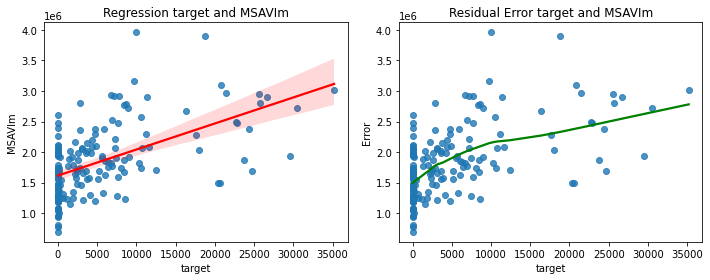

DVIm
slope:  18.200356423915597
intersept:  1064642.4804235382
r2:  0.441138409985149
P_value:  2.4188768508849563e-09
std error:  2.8824914322432957


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


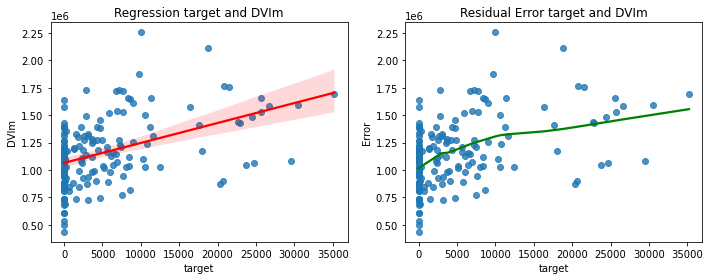

SAVIm
slope:  48.55683057171555
intersept:  1825622.4709524717
r2:  0.5735275296550979
P_value:  5.457233633889167e-16
std error:  5.399291361774142


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


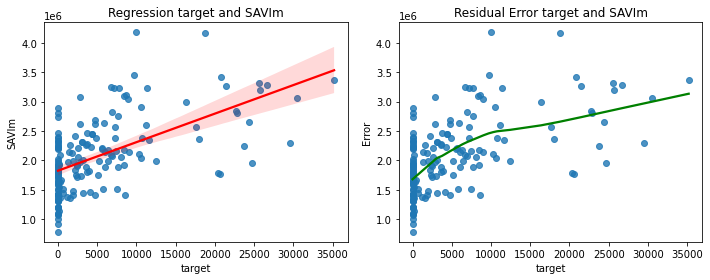

NDVIm
slope:  124.36493736615549
intersept:  2909083.5146003026
r2:  0.6718503940153443
P_value:  2.830601311676816e-23
std error:  10.673775317335554


C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


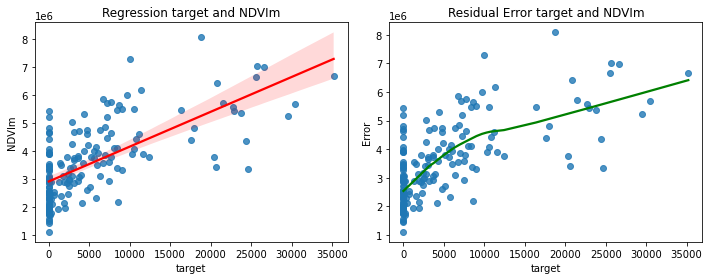

C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\rmcgr\Miniconda3\envs\biomass_zonal\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


MSRm
slope:  262.7361421909955
intersept:  3539677.2543030777
r2:  0.6719494436596211
P_value:  2.7741026766602144e-23
std error:  22.54359677505514


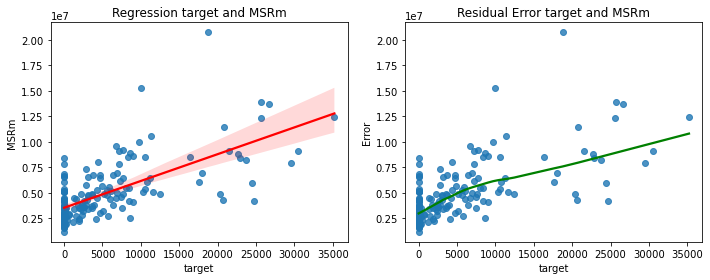

In [39]:
for i in model_data.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(model_data[value_x], model_data[value_y_loop], line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(model_data[value_x], model_data[value_y_loop])

    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(model_data[value_x], model_data[value_y_loop], lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
#     slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

#     print("slope: ", slope)
#     print("intersept: ", intercept)
#     print("r2: ", r_value)
#     print("P_value: ", p_value)
#     print("std error: ", std_err)

slope:  262.7361421909955
intersept:  3539677.2543030777
r2:  0.6719494436596211
P_value:  2.7741026766602144e-23
std error:  22.54359677505514


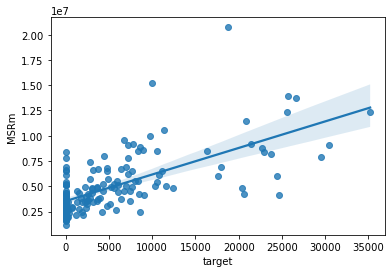

In [40]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b2_dbi_mean'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

slope:  262.7361421909955
intersept:  3539677.2543030777
r2:  0.6719494436596211
P_value:  2.7741026766602144e-23
std error:  22.54359677505514


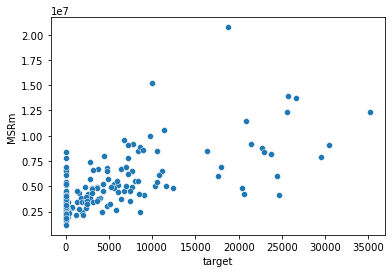

In [41]:
# value_x = 'bio_agb_kg1ha'
# value_y = 'b3_dbi_mean'
sns.scatterplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [42]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 175) (116,)
(51, 175) (51,)


### Plot up Histograms of  train and test datasets

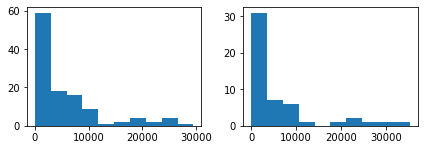

In [43]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [44]:
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"
str_model = f"rf_{abr}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x239AD734AE8)
rf_<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>_all_values_n_est_300_rs_1_maxd_4_20230202_191403


In [45]:
n_est = 100
lr=0.1
rs = 1
maxd = 4
loss = 'squared_error'

rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
print(rfrModel_1)
mdl = "gbr"
str_model = f"rf_{mdl}_{model_data_name}_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

GradientBoostingRegressor(max_depth=4, random_state=1)
rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230202_191403


In [46]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [47]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [48]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [49]:
np.nan_to_num(X_1)

array([[7.0366025e+00, 1.9299746e+01, 1.2820236e+01, ..., 1.9958580e+06,
        3.7710930e+06, 4.8688810e+06],
       [7.5294375e-01, 3.7410915e+00, 1.9014293e+00, ..., 1.6254750e+06,
        2.2963290e+06, 2.6339420e+06],
       [4.2191148e+00, 1.5538734e+01, 8.5756245e+00, ..., 1.9151610e+06,
        3.1784330e+06, 3.8992000e+06],
       ...,
       [5.2614689e+00, 2.5453907e+01, 1.3082605e+01, ..., 2.5747220e+06,
        4.4010010e+06, 6.0376650e+06],
       [1.2128949e+00, 4.2191148e+00, 3.2573235e+00, ..., 1.5217960e+06,
        2.9367180e+06, 3.5334590e+06],
       [4.2191148e+00, 1.8330997e+01, 1.0821098e+01, ..., 2.0907770e+06,
        3.5521830e+06, 4.4976730e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [50]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


plot saved to: F:\cdu\data\zonal_stats\output\20230202\ml_rf_reg_dir\20230202_191403\all_values\rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230202_191403_plot.jpg


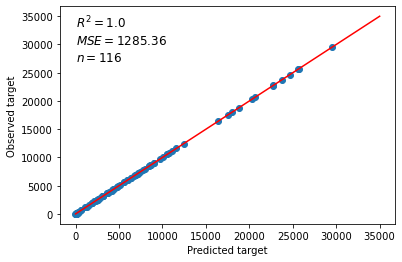

In [51]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


                  band                      n
94     b1_dim_0608_std  9.998068287335972e-05
87    b3_dim_0305_mean   9.83522855689181e-05
143          tmax_mean   9.53038345460071e-06
1    b1_fpca2_0509_max  9.151669234574287e-05
45     b1_dp1_0112_min  9.013492944792668e-06
..                 ...                    ...
34     b5_dbi_0608_std  0.0001346741963117451
173              NDVIm  0.0001331254055043343
54     b2_dp1_0112_med                    0.0
82    b2_dim_0305_mean                    0.0
46     b1_dp1_0112_max                    0.0

[175 rows x 2 columns]


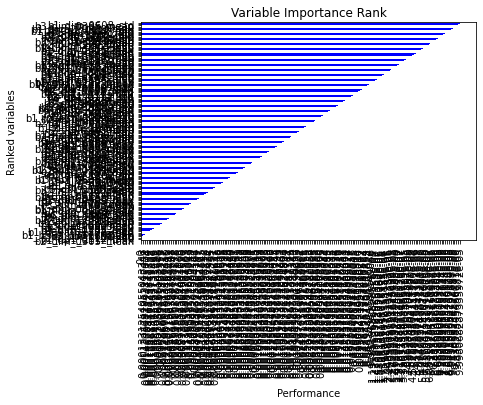

In [52]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

In [53]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 94 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    175 non-null    object
 1   n       175 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 94 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    175 non-null    object 
 1   n       175 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [54]:
num_bf_selection = 0.01
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [55]:
column_var = df_var.band.tolist()

In [56]:
column_var.insert(0, 'target')

In [57]:
select_model_data = df_ml[column_var]

In [58]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'{str_model}_feature_imp_n_{num_bf_selection}_.csv'), index=False)
df_corr

target  b1_h99a_01122_max  b2_dbi_0608_mean  \
target               1.00               0.65             -0.57   
b1_h99a_01122_max    0.65               1.00             -0.70   
b2_dbi_0608_mean    -0.57              -0.70              1.00   
b2_dp1_0509_std      0.18               0.26             -0.29   
b3_dp1_0509_max     -0.39              -0.54              0.40   
b2_dbi_0608_max     -0.53              -0.66              0.97   
b2_dbi_0608_med     -0.58              -0.70              1.00   
b6_dbi_0608_med     -0.62              -0.71              0.83   
CVIm                 0.46               0.55             -0.75   
b2_dp1_0112_max      0.63               0.75             -0.75   
b2_dp1_0112_std      0.12               0.20             -0.20   
b3_dp1_0112_std     -0.14              -0.10              0.16   
b6_dbi_0608_min     -0.64              -0.73              0.84   
evp_s_mean          -0.25              -0.27              0.32   
b2_dbi_0608_min     -0.57              -0.70              0.98   
rh_tmin_mean         0.37               0.44             -0.46   
b3_dbi_0608_med     -0.62              -0.73              0.98   
b3_dim_0305_std     -0.15              -0.17              0.26   

                   b2_dp1_0509_std  b3_dp1_0509_max  b2_dbi_0608_max  \
target                        0.18            -0.39            -0.53   
b1_h99a_01122_max             0.26            -0.54            -0.66   
b2_dbi_0608_mean             -0.29             0.40             0.97   
b2_dp1_0509_std               1.00            -0.01            -0.21   
b3_dp1_0509_max              -0.01             1.00             0.38   
b2_dbi_0608_max              -0.21             0.38             1.00   
b2_dbi_0608_med              -0.30             0.41             0.97   
b6_dbi_0608_med              -0.14             0.38             0.82   
CVIm                          0.17            -0.31            -0.73   
b2_dp1_0112_max               0.47            -0.53            -0.70   
b2_dp1_0112_std               0.83             0.13            -0.11   
b3_dp1_0112_std               0.56             0.25             0.21   
b6_dbi_0608_min              -0.24             0.41             0.79   
evp_s_mean                   -0.17             0.20             0.31   
b2_dbi_0608_min              -0.35             0.40             0.90   
rh_tmin_mean                  0.35            -0.30            -0.44   
b3_dbi_0608_med              -0.30             0.41             0.94   
b3_dim_0305_std               0.18             0.17             0.35   

                   b2_dbi_0608_med  b6_dbi_0608_med  CVIm  b2_dp1_0112_max  \
target                       -0.58            -0.62  0.46             0.63   
b1_h99a_01122_max            -0.70            -0.71  0.55             0.75   
b2_dbi_0608_mean              1.00             0.83 -0.75            -0.75   
b2_dp1_0509_std              -0.30            -0.14  0.17             0.47   
b3_dp1_0509_max               0.41             0.38 -0.31            -0.53   
b2_dbi_0608_max               0.97             0.82 -0.73            -0.70   
b2_dbi_0608_med               1.00             0.83 -0.75            -0.75   
b6_dbi_0608_med               0.83             1.00 -0.59            -0.72   
CVIm                         -0.75            -0.59  1.00             0.55   
b2_dp1_0112_max              -0.75            -0.72  0.55             1.00   
b2_dp1_0112_std              -0.20            -0.09  0.08             0.41   
b3_dp1_0112_std               0.16             0.21 -0.16             0.06   
b6_dbi_0608_min               0.84             0.96 -0.60            -0.75   
evp_s_mean                    0.32             0.33 -0.20            -0.22   
b2_dbi_0608_min               0.98             0.79 -0.73            -0.75   
rh_tmin_mean                 -0.46            -0.33  0.38             0.50   
b3_dbi_0608_med               0.98             0.88 -0.66            

In [59]:
variable_imp_list = dfsort.band.to_list()

In [60]:
variable_imp_list

['b1_dim_0608_std',
 'b3_dim_0305_mean',
 'tmax_mean',
 'b1_fpca2_0509_max',
 'b1_dp1_0112_min',
 'b1_h99a_01122_min',
 'b1_dbi_0608_std',
 'b3_dim_0911_std',
 'b2_dim_1202_min',
 'b3_dim_1202_min',
 'b2_dim_0911_med',
 'ratio43m',
 'b6_dbi_0608_std',
 'b3_dp1_0112_min',
 'b3_dim_0608_mean',
 'et_mp_mean',
 'b2_dim_1202_med',
 'SAVIm',
 'b1_dim_0305_min',
 'b1_dim_0305_mean',
 'b1_dim_0305_max',
 'b3_dim_0911_med',
 'b2_dim_0305_min',
 'evp_ml_mean',
 'NBRm',
 'b3_dim_0608_med',
 'b1_dbi_0608_min',
 'b3_dp1_0112_med',
 'b1_dp1_0112_med',
 'b1_dim_1202_min',
 'b2_dim_0608_std',
 'rain_d_mean',
 'b1_dp1_0112_mean',
 'b1_dim_1202_med',
 'b3_dp1_0112_max',
 'b3_dp1_0509_mean',
 'b2_dp1_0112_min',
 'NDIIm',
 'b1_dim_0305_med',
 'b1_dp1_0112_std',
 'b1_dim_1202_max',
 'b1_dim_0911_med',
 'ratio64m',
 'b1_dja_0305_min',
 'b2_dim_0608_med',
 'b2_dim_0305_max',
 'b3_dp1_0112_mean',
 'b1_dim_1202_mean',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dp1_0509_std',
 'b3_dp1_0509_max',
 'b2_dbi_0

### Run same model and same peramiters with selected features

In [61]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(116, 17) (116,)
(51, 17) (51,)


In [62]:
if mdl == "abr":
    
    rng = np.random.RandomState(rs)
    rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
    str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)


elif mdl== gbr:
    rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
    str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)
else:
    pass
        

In [63]:
np.nan_to_num(X_1)

array([[1.7519630e+01, 5.1687500e+02, 1.9309052e+00, ..., 3.3318999e+03,
        6.7850000e+02, 2.3150325e+00],
       [1.2225477e+01, 6.9856250e+02, 2.8539481e+00, ..., 3.3640000e+03,
        1.0750000e+03, 2.0766559e+00],
       [8.6038208e+00, 5.8064001e+02, 1.8525925e+00, ..., 3.3765000e+03,
        8.7700000e+02, 2.1666565e+00],
       ...,
       [1.2032028e+01, 9.8106250e+02, 2.8539481e+00, ..., 3.3720000e+03,
        1.4395000e+03, 1.1162857e+00],
       [1.2928467e+01, 6.9120001e+02, 2.9101779e+00, ..., 3.3367500e+03,
        1.0180000e+03, 1.9530489e+00],
       [1.3412415e+01, 6.8781250e+02, 2.3418744e+00, ..., 3.3765000e+03,
        1.0230000e+03, 3.0663242e+00]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [64]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

plot saved to: F:\cdu\data\zonal_stats\output\20230202\ml_rf_reg_dir\20230202_191403\all_values\rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230202_191403_select_feat_plot.jpg


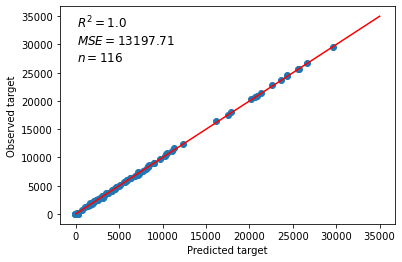

In [65]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_select_feat_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


                 band                     n
0   b1_h99a_01122_max   0.48632155806069965
16    b3_dim_0305_std   0.10248747683749355
4     b2_dbi_0608_max   0.09208422336941469
1    b2_dbi_0608_mean   0.04667273329601376
2     b2_dp1_0509_std   0.04078439557483457
9     b2_dp1_0112_std   0.03794304508657937
11    b6_dbi_0608_min   0.03165106576291684
5     b2_dbi_0608_med  0.027074397629641343
12         evp_s_mean   0.02550055947019501
14       rh_tmin_mean  0.022535072231367248
8     b2_dp1_0112_max  0.020204599829692936
13    b2_dbi_0608_min  0.018579648402069538
10    b3_dp1_0112_std  0.016827775877540238
7                CVIm   0.01120070866783869
3     b3_dp1_0509_max  0.009758390802576029
6     b6_dbi_0608_med  0.006295297327141002
15    b3_dbi_0608_med  0.004079051773985529


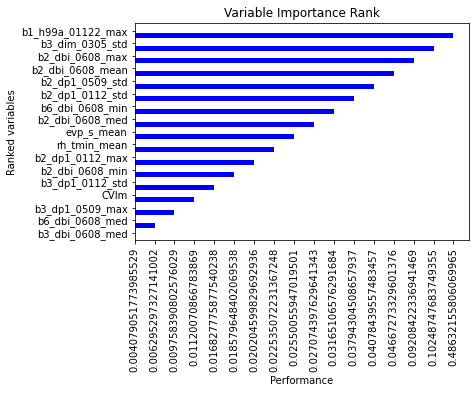

In [66]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_select_features_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

In [68]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [2]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))


r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$n = {len(y_1)}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

NameError: name 'rfrLCHM' is not defined

In [70]:
str_model

'rf_gbr_all_values_n_est_100_lr0.1_squared_error_rs_1_maxd_4_20230202_191403'

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

[ 1.83995221e+04  2.73742927e+04  2.34352609e+04  2.05387740e+04
  2.70956507e+04  2.11388083e+04  1.73815361e+04  1.89281749e+04
  1.93122055e+04  1.38553862e+04  5.32725725e+03  1.26028447e+04
  3.68350685e+03  9.73396048e+03  6.68744580e+03  5.88708496e+03
  5.80404434e+03  6.13064283e+03  8.55683493e+03  2.53922863e+03
  5.81208183e+03  6.10218928e+03  4.23677399e+03  6.43451716e+03
  5.91320652e+03  5.99240641e+03  3.85630201e+03  3.51519434e+03
  3.92605110e+03  4.84026474e+03 -1.10202186e+02  6.64339775e+01
 -7.33214578e+01 -5.42906249e+01 -4.93214076e+01  9.14004339e+00
  2.25415418e+01  2.01448498e+03  1.63740894e+03  1.88813460e+02
  2.32586197e+02  2.77873070e+02  2.85897191e+02  3.69609057e+02
  3.61943353e+02  4.41869907e+02  1.66284791e+03  5.62434531e+02
  9.16716004e+02  9.43858374e+02  1.11374895e+03]
[3.5199711e+04 1.8757199e+04 3.0472447e+04 2.2699391e+04 1.1338128e+04
 6.6990000e+03 2.9932466e+03 2.8244580e+03 3.0861599e+03 9.9955098e+03
 1.0569772e+04 7.7153999e+03

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [72]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'rf_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

## Load in unseen data here

In [73]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
new_data = select_model_data
# df = pd.read_csv(csv_file, header=0)
# df.shape 

In [74]:
c_list = new_data.columns.tolist()
c_list

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dp1_0509_std',
 'b3_dp1_0509_max',
 'b2_dbi_0608_max',
 'b2_dbi_0608_med',
 'b6_dbi_0608_med',
 'CVIm',
 'b2_dp1_0112_max',
 'b2_dp1_0112_std',
 'b3_dp1_0112_std',
 'b6_dbi_0608_min',
 'evp_s_mean',
 'b2_dbi_0608_min',
 'rh_tmin_mean',
 'b3_dbi_0608_med',
 'b3_dim_0305_std']

In [75]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

(110, 18)


C:\Users\rmcgr\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [76]:
df1.columns

Index(['target', 'b1_h99a_01122_max', 'b2_dbi_0608_mean', 'b2_dp1_0509_std',
       'b3_dp1_0509_max', 'b2_dbi_0608_max', 'b2_dbi_0608_med',
       'b6_dbi_0608_med', 'CVIm', 'b2_dp1_0112_max', 'b2_dp1_0112_std',
       'b3_dp1_0112_std', 'b6_dbi_0608_min', 'evp_s_mean', 'b2_dbi_0608_min',
       'rh_tmin_mean', 'b3_dbi_0608_med', 'b3_dim_0305_std'],
      dtype='object')

In [77]:
column_var

['target',
 'b1_h99a_01122_max',
 'b2_dbi_0608_mean',
 'b2_dp1_0509_std',
 'b3_dp1_0509_max',
 'b2_dbi_0608_max',
 'b2_dbi_0608_med',
 'b6_dbi_0608_med',
 'CVIm',
 'b2_dp1_0112_max',
 'b2_dp1_0112_std',
 'b3_dp1_0112_std',
 'b6_dbi_0608_min',
 'evp_s_mean',
 'b2_dbi_0608_min',
 'rh_tmin_mean',
 'b3_dbi_0608_med',
 'b3_dim_0305_std']

In [78]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 7 to 166
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             110 non-null    float64
 1   b1_h99a_01122_max  110 non-null    float64
 2   b2_dbi_0608_mean   110 non-null    float64
 3   b2_dp1_0509_std    110 non-null    float64
 4   b3_dp1_0509_max    110 non-null    float64
 5   b2_dbi_0608_max    110 non-null    float64
 6   b2_dbi_0608_med    110 non-null    float64
 7   b6_dbi_0608_med    110 non-null    float64
 8   CVIm               110 non-null    int64  
 9   b2_dp1_0112_max    110 non-null    float64
 10  b2_dp1_0112_std    110 non-null    float64
 11  b3_dp1_0112_std    110 non-null    float64
 12  b6_dbi_0608_min    110 non-null    float64
 13  evp_s_mean         110 non-null    float64
 14  b2_dbi_0608_min    110 non-null    float64
 15  rh_tmin_mean       110 non-null    float64
 16  b3_dbi_0608_med    110 non

In [79]:
df1

target  b1_h99a_01122_max  b2_dbi_0608_mean  b2_dp1_0509_std  \
7    1894.20               5.20           1153.48             0.74   
8    1536.15              12.23            760.10             2.85   
9    1164.24              12.23           1144.50             2.85   
10   4736.01              12.23            698.56             2.85   
12   1549.09              12.23            890.55             2.85   
..       ...                ...               ...              ...   
162 20805.22              20.42            430.12             1.89   
163 30472.45              21.59            447.75             2.05   
164 24414.13              16.81            628.84             1.89   
165 17598.35              20.05            611.56             6.61   
166  9995.51              18.40            489.80             2.85   

     b3_dp1_0509_max  b2_dbi_0608_max  b2_dbi_0608_med  b6_dbi_0608_med  \
7              82.00          1236.00          1144.00          2219.00   
8              66.10           870.00           761.50          2051.00   
9              66.10          1204.00          1135.00          2593.00   
10             66.10           742.00           696.00          1538.00   
12             66.10          1037.00           874.00          1779.00   
..               ...              ...              ...              ...   
162            42.00           485.00           417.00           886.50   
163            52.00           494.00           449.00           979.00   
164            54.00           786.00           616.00          1312.00   
165            75.00           717.00           594.00          1261.50   
166            66.10           521.00           488.50           743.50   

         CVIm  b2_dp1_0112_max  b2_dp1_0112_std  b3_dp1_0112_std  \
7    27787498            11.00             2.71             2.90   
8    38847091            24.00             5.25             4.73   
9    38129692             9.00             2.17             5.92   
10   39286295            34.00             7.79             4.32   
12   40090355            37.00             3.83             7.06   
..        ...              ...              ...              ...   
162  59838832            57.00             3.14             2.10   
163  66182154            47.00             2.18             2.05   
164  59036117            36.00             2.56             1.99   
165  55188162            39.00             5.80             4.23   
166  46855190            29.79             3.05             3.62   

     b6_dbi_0608_min  evp_s_mean  b2_dbi_0608_min  rh_tmin_mean  \
7            2007.00        9.80          1081.00       3339.70   
8            1485.00        9.30           583.00       3319.60   
9            2498.00        7.20          1088.00       3363.80   
10           1416.00        5.20           667.00       3364.00   
12           1496.00        8.10           768.00       3350.30   
..               ...         ...              ...           ...   
162           652.00        5.70           396.00       3368.70   
163           713.00        6.00           387.00       3374.40   
164          1145.00        6.00           550.00       3374.00   
165           957.00        6.30           526.00       3371.30   
166           684.00        5.00           468.00       3351.00   

     b3_dbi_0608_med  b3_dim_0305_std  
7            1544.00             4.27  
8            1202.50             4.24  
9            1844.50             4.66  
10           1075.00             2.08  
12           1236.00             3.38  
..               ...              ...  
162           483.00             1.85  
163           616.50             1.66  
164           875.00             1.85  
165           857.50             3.69  
166           418.50             3.09  

[110 rows x 18 columns]

In [81]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

110


In [82]:
xdata2

b1_h99a_01122_max  b2_dbi_0608_mean  b2_dp1_0509_std  b3_dp1_0509_max  \
7                 5.20           1153.48             0.74            82.00   
8                12.23            760.10             2.85            66.10   
9                12.23           1144.50             2.85            66.10   
10               12.23            698.56             2.85            66.10   
12               12.23            890.55             2.85            66.10   
..                 ...               ...              ...              ...   
162              20.42            430.12             1.89            42.00   
163              21.59            447.75             2.05            52.00   
164              16.81            628.84             1.89            54.00   
165              20.05            611.56             6.61            75.00   
166              18.40            489.80             2.85            66.10   

     b2_dbi_0608_max  b2_dbi_0608_med  b6_dbi_0608_med        CVIm  \
7            1236.00          1144.00          2219.00 27787498.00   
8             870.00           761.50          2051.00 38847092.00   
9            1204.00          1135.00          2593.00 38129692.00   
10            742.00           696.00          1538.00 39286296.00   
12           1037.00           874.00          1779.00 40090356.00   
..               ...              ...              ...         ...   
162           485.00           417.00           886.50 59838832.00   
163           494.00           449.00           979.00 66182152.00   
164           786.00           616.00          1312.00 59036116.00   
165           717.00           594.00          1261.50 55188160.00   
166           521.00           488.50           743.50 46855192.00   

     b2_dp1_0112_max  b2_dp1_0112_std  b3_dp1_0112_std  b6_dbi_0608_min  \
7              11.00             2.71             2.90          2007.00   
8              24.00             5.25             4.73          1485.00   
9               9.00             2.17             5.92          2498.00   
10             34.00             7.79             4.32          1416.00   
12             37.00             3.83             7.06          1496.00   
..               ...              ...              ...              ...   
162            57.00             3.14             2.10           652.00   
163            47.00             2.18             2.05           713.00   
164            36.00             2.56             1.99          1145.00   
165            39.00             5.80             4.23           957.00   
166            29.79             3.05             3.62           684.00   

     evp_s_mean  b2_dbi_0608_min  rh_tmin_mean  b3_dbi_0608_med  \
7          9.80          1081.00       3339.70          1544.00   
8          9.30           583.00       3319.60          1202.50   
9          7.20          1088.00       3363.80          1844.50   
10         5.20           667.00       3364.00          1075.00   
12         8.10           768.00       3350.30          1236.00   
..          ...              ...           ...              ...   
162        5.70           396.00       3368.70           483.00   
163        6.00           387.00       3374.40           616.50   
164        6.00           550.00       3374.00           875.00   
165        6.30           526.00       3371.30           857.50   
166        5.00           468.00       3351.00           418.50   

     b3_dim_0305_std  
7               4.27  
8               4.24  
9               4.66  
10              2.08  
12              3.38  
..               ...  
162             1.85  
163             1.66  
164             1.85  
165             3.69  
166             3.09  

[110 rows x 17 columns]

Predicted data r2 = 0.7407051418132184
MSE = 16131161.684
RMSE = 4016.362
explained_var = 0.748
bias = -675.880
n = 110


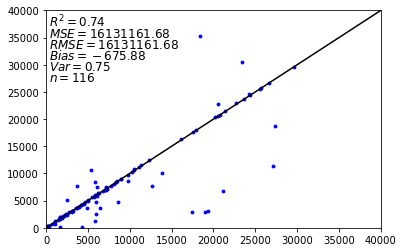

In [83]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()